# Hotel Booking Demand : Customer Data Analysis

refrensi
* https://www.kaggle.com/code/niteshyadav3103/hotel-booking-prediction-99-5-acc
* https://julkel.medium.com/predicting-hotel-booking-cancellations-using-customer-segmentation-and-neural-networks-8a31c2755f5c
* https://www.kaggle.com/code/gwen08/hotel-booking-cancellations-predictive-analysis#6.1-Conclusion






## Business Problem Understanding

**Context**

In the hospitality industry, efficient management of hotel reservations is necessary to optimize revenue. A study conducted by D-Edge Hospitality Solutions found that the cancellation rate across various booking channels in Europe reached almost 40% in 2018 ([Source](https://www.d-edge.com/how-online-hotel-distribution-is-changing-in-europe/)). Booking cancellations can potentially disrupt operational schedules and reduce potential revenues. Being able to predict booking cancellations is important for implementing strategies to reduce their impact on scheduling and operations.

**Problem Statement**

Booking cancellation can cause potential revenue loss, underutilization of hotel assets, and operational schedule disruption. It is difficult to predict cancellation in advance. Therefore, it is necessary to develop a solution that could predict booking cancellations in advance to minimize potential loss and disruptions.

**Goals**

The goal is to develop a model that could accurately predict booking cancellations before they occur. This model uses historical customer booking data to identify potential cancellations. This could help the hotel in implementing proactive measures to the particular booking such as dynamic pricing or discount offers to discourage cancellation or mitigate potential revenue loss.

**Analytic Approach**

The approach involves gathering historical booking dataset, preprocessing the data by handling missing values, outliers, and data duplicates, analyzing patterns and correlations in the data, encoding categorical and numerical features from the dataset, and training various ML models and its variations to predict the probability of a booking being canceled by assessing its evaluation metrics to ensure it meets the business goals.

**Evaluation Metric**

The performance of the models will be evaluated using metrics such as precision, recall, and F1 score. The primary metric for evaluation will be selected based on its relevance to the business context.

(Positive = Flagged as potentially canceled booking)

* Precision

  The ratio of correctly predicted cancellations to all predicted cancellations (true positives / (true positives + false positives)).

  High precision means that when a booking is predicted to be a cancellation, it is likely correct. This is important to avoid unnecessary actions on bookings that will not cancel.

* Recall

  The ratio of correctly predicted cancellations to all actual cancellations (true positives / (true positives + false negatives)).

  High recall means fewer actual cancellations are missed. This is important if the business wants to ensure that most potential cancellations are identified.

* F1-score

  The harmonic mean of precision and recall (2 * (precision * recall) / (precision + recall)).

  F1-score is used when a balance between catching most cancellations (recall) and ensuring that flagged cancellations are mostly correct (precision) are required. This important if both missing cancellations and misclassifying non-cancellations have comparable business costs.


In this case, if the proactive measure to prevent potential cancellations is to offer discounted pricing (for example, 30%) to discourage cancellations, the effects are as follows:

  **False Negatives:** Loss of 100% of the potential revenue due to the loss of a customer who cancels but was not predicted to cancel.

  **False Positives:** Loss of 30% of the potential maximum revenue because a discount was offered to a customer who would not have canceled and would have paid full price.

Therefore, it is more important to minimize false negatives because their potential loss is higher. As such, the primary evaluation metric for this project will be recall.


## Data Understanding

The data is originally from the article *Hotel Booking Demand Datasets*, written by Nuno Antonio, Ana Almeida, and Luis Nunes for Data in Brief, Volume 22, February 2019.

This data article describes two datasets with hotel demand data. One of the hotels (H1) is a resort hotel and the other is a city hotel (H2). Both datasets share the same structure, with 31 variables describing the 40,060 observations of H1 and 79,330 observations of H2. Each observation represents a hotel booking. Both datasets comprehend bookings due to arrive between the 1st of July of 2015 and the 31st of August 2017, including bookings that effectively arrived and bookings that were canceled.

In [60]:
!pip install category_encoders

In [61]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import spearmanr, pointbiserialr

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from category_encoders import BinaryEncoder
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, KFold, cross_validate, cross_val_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.base import BaseEstimator, ClassifierMixin


In [62]:
# Library

import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from IPython.display import display

# Feature Engineering
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
import category_encoders as ce
from scipy.stats import stats, spearmanr, shapiro, mannwhitneyu, chi2_contingency


# Model Selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV,StratifiedKFold,train_test_split, cross_val_score, cross_validate
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score
from sklearn.metrics import roc_curve, roc_auc_score, RocCurveDisplay

# Imbalance Dataset
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler

from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import CondensedNearestNeighbour
from imblearn.under_sampling import NeighbourhoodCleaningRule
from imblearn.under_sampling import NearMiss
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

# Ignore Warning
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

# Set max columns
pd.set_option('display.max_columns', None)

In [63]:
# Load the dataset
df = pd.read_csv('hotel_bookings.csv')

In [64]:
# Display the first 5 rows of the dataset
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


**Hotel** = Resort hotel or city hotel

**is_canceled** = Value indicating if the booking was canceled (1) or not (0)

**lead_time** = Number of days that elapsed between the entering date of the booking into the PMS and the arrival date

**arrival_date_year** = Year of arrival date

**arrival_date_month** = Month of arrival date

**stays_in_weekend_nights** = Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel

**stays_in_week_nights** = Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel

**adults** = Number of adults

**children** = Number of children

**babies** = Number of babies

**meal**
Type of meal booked.
Categories are presented in standard hospitality meal packages: Undefined/SC – no meal package; BB – Bed & Breakfast; HB – Half board (breakfast and one other meal – usually dinner); FB – Full board (breakfast, lunch and dinner)

**adr**
Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights

**required_car_parking_spaces**
Number of car parking spaces required by the customer

**total_of_special_requests**
Number of special requests made by the customer (e.g. twin bed or high floor)

**reservation_status**
Reservation last status, assuming one of three categories: Canceled – booking was canceled by the customer; Check-Out – customer has checked in but already departed; No-Show – customer did not check-in and did inform the hotel of the reason why

**reservation_status_date**
Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to understand when was the booking canceled or when did the customer checked-out of the hotel

In [65]:
df.shape

(119390, 32)

### Missing values

In [66]:
# show null / missing values
df.isna().sum().sort_values(ascending = False)

company                           112593
agent                              16340
country                              488
children                               4
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
hotel                                  0
previous_cancellations                 0
days_in_waiting_list                   0
customer_type                          0
adr                                    0
required_car_parking_spaces            0
total_of_special_requests              0
reservation_status                     0
previous_bookings_not_canceled         0
is_repeated_guest                      0
is_canceled                            0
distribution_channel                   0
market_segment                         0
meal                                   0
babies                                 0
adults                                 0
stays_in_week_ni

<Axes: >

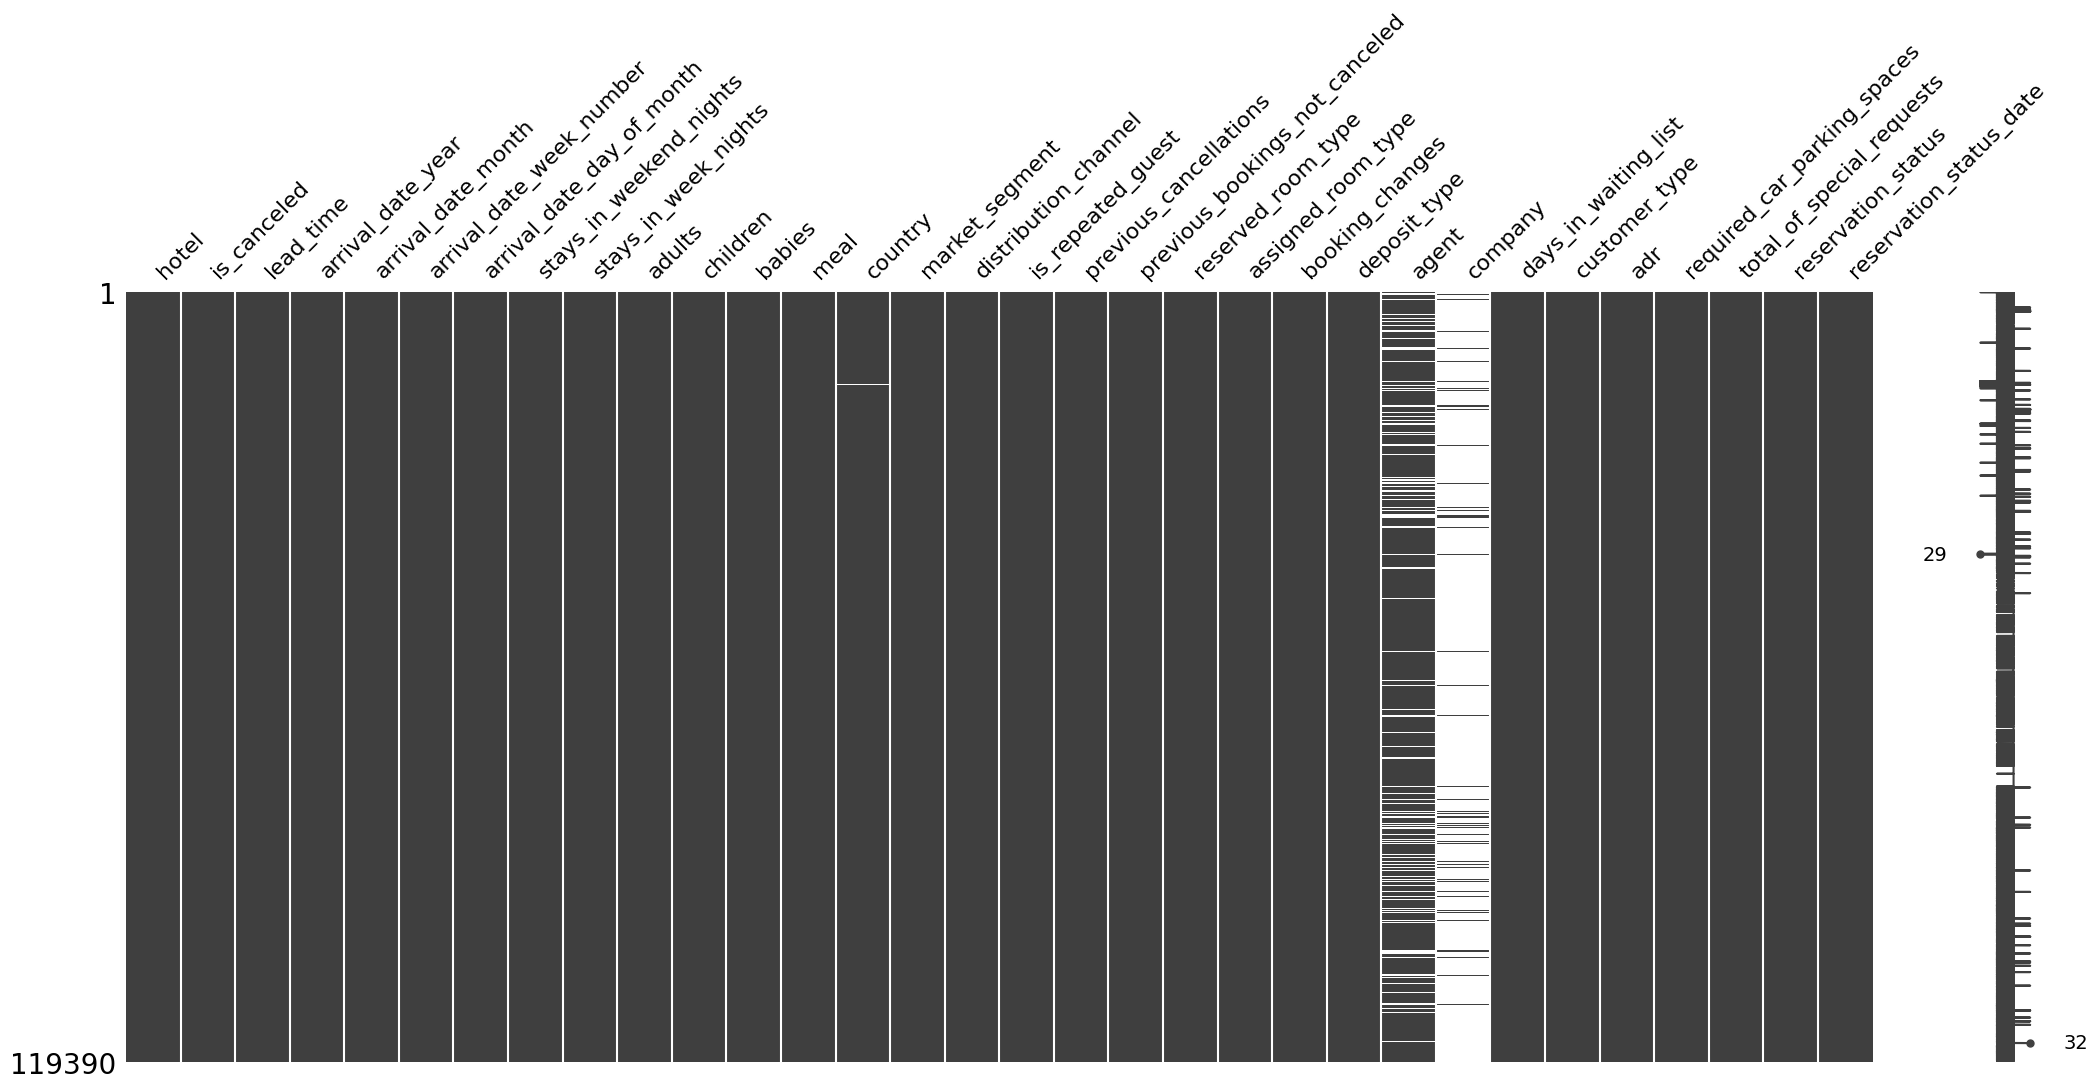

In [67]:
msno.matrix(df)

In [68]:
# Showing the data type, missing values, and unique values for each column

listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum()/len(df[col])) * 100,2),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(1).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
dfDesc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,hotel,object,0,0.00,2,[City Hotel]
1,is_canceled,int64,0,0.00,2,[0]
2,lead_time,int64,0,0.00,479,[55]
3,arrival_date_year,int64,0,0.00,3,[2015]
4,arrival_date_month,object,0,0.00,12,[May]
5,arrival_date_week_number,int64,0,0.00,53,[12]
6,arrival_date_day_of_month,int64,0,0.00,31,[22]
7,stays_in_weekend_nights,int64,0,0.00,17,[9]
8,stays_in_week_nights,int64,0,0.00,35,[40]
9,adults,int64,0,0.00,14,[2]


In [69]:
# Numerical Column
numerik =  df.select_dtypes(include=['int64','float64'])

# Categorical Column
kategorik = df.select_dtypes(include=['object'])

### Numerical Features

#### Data Distribution

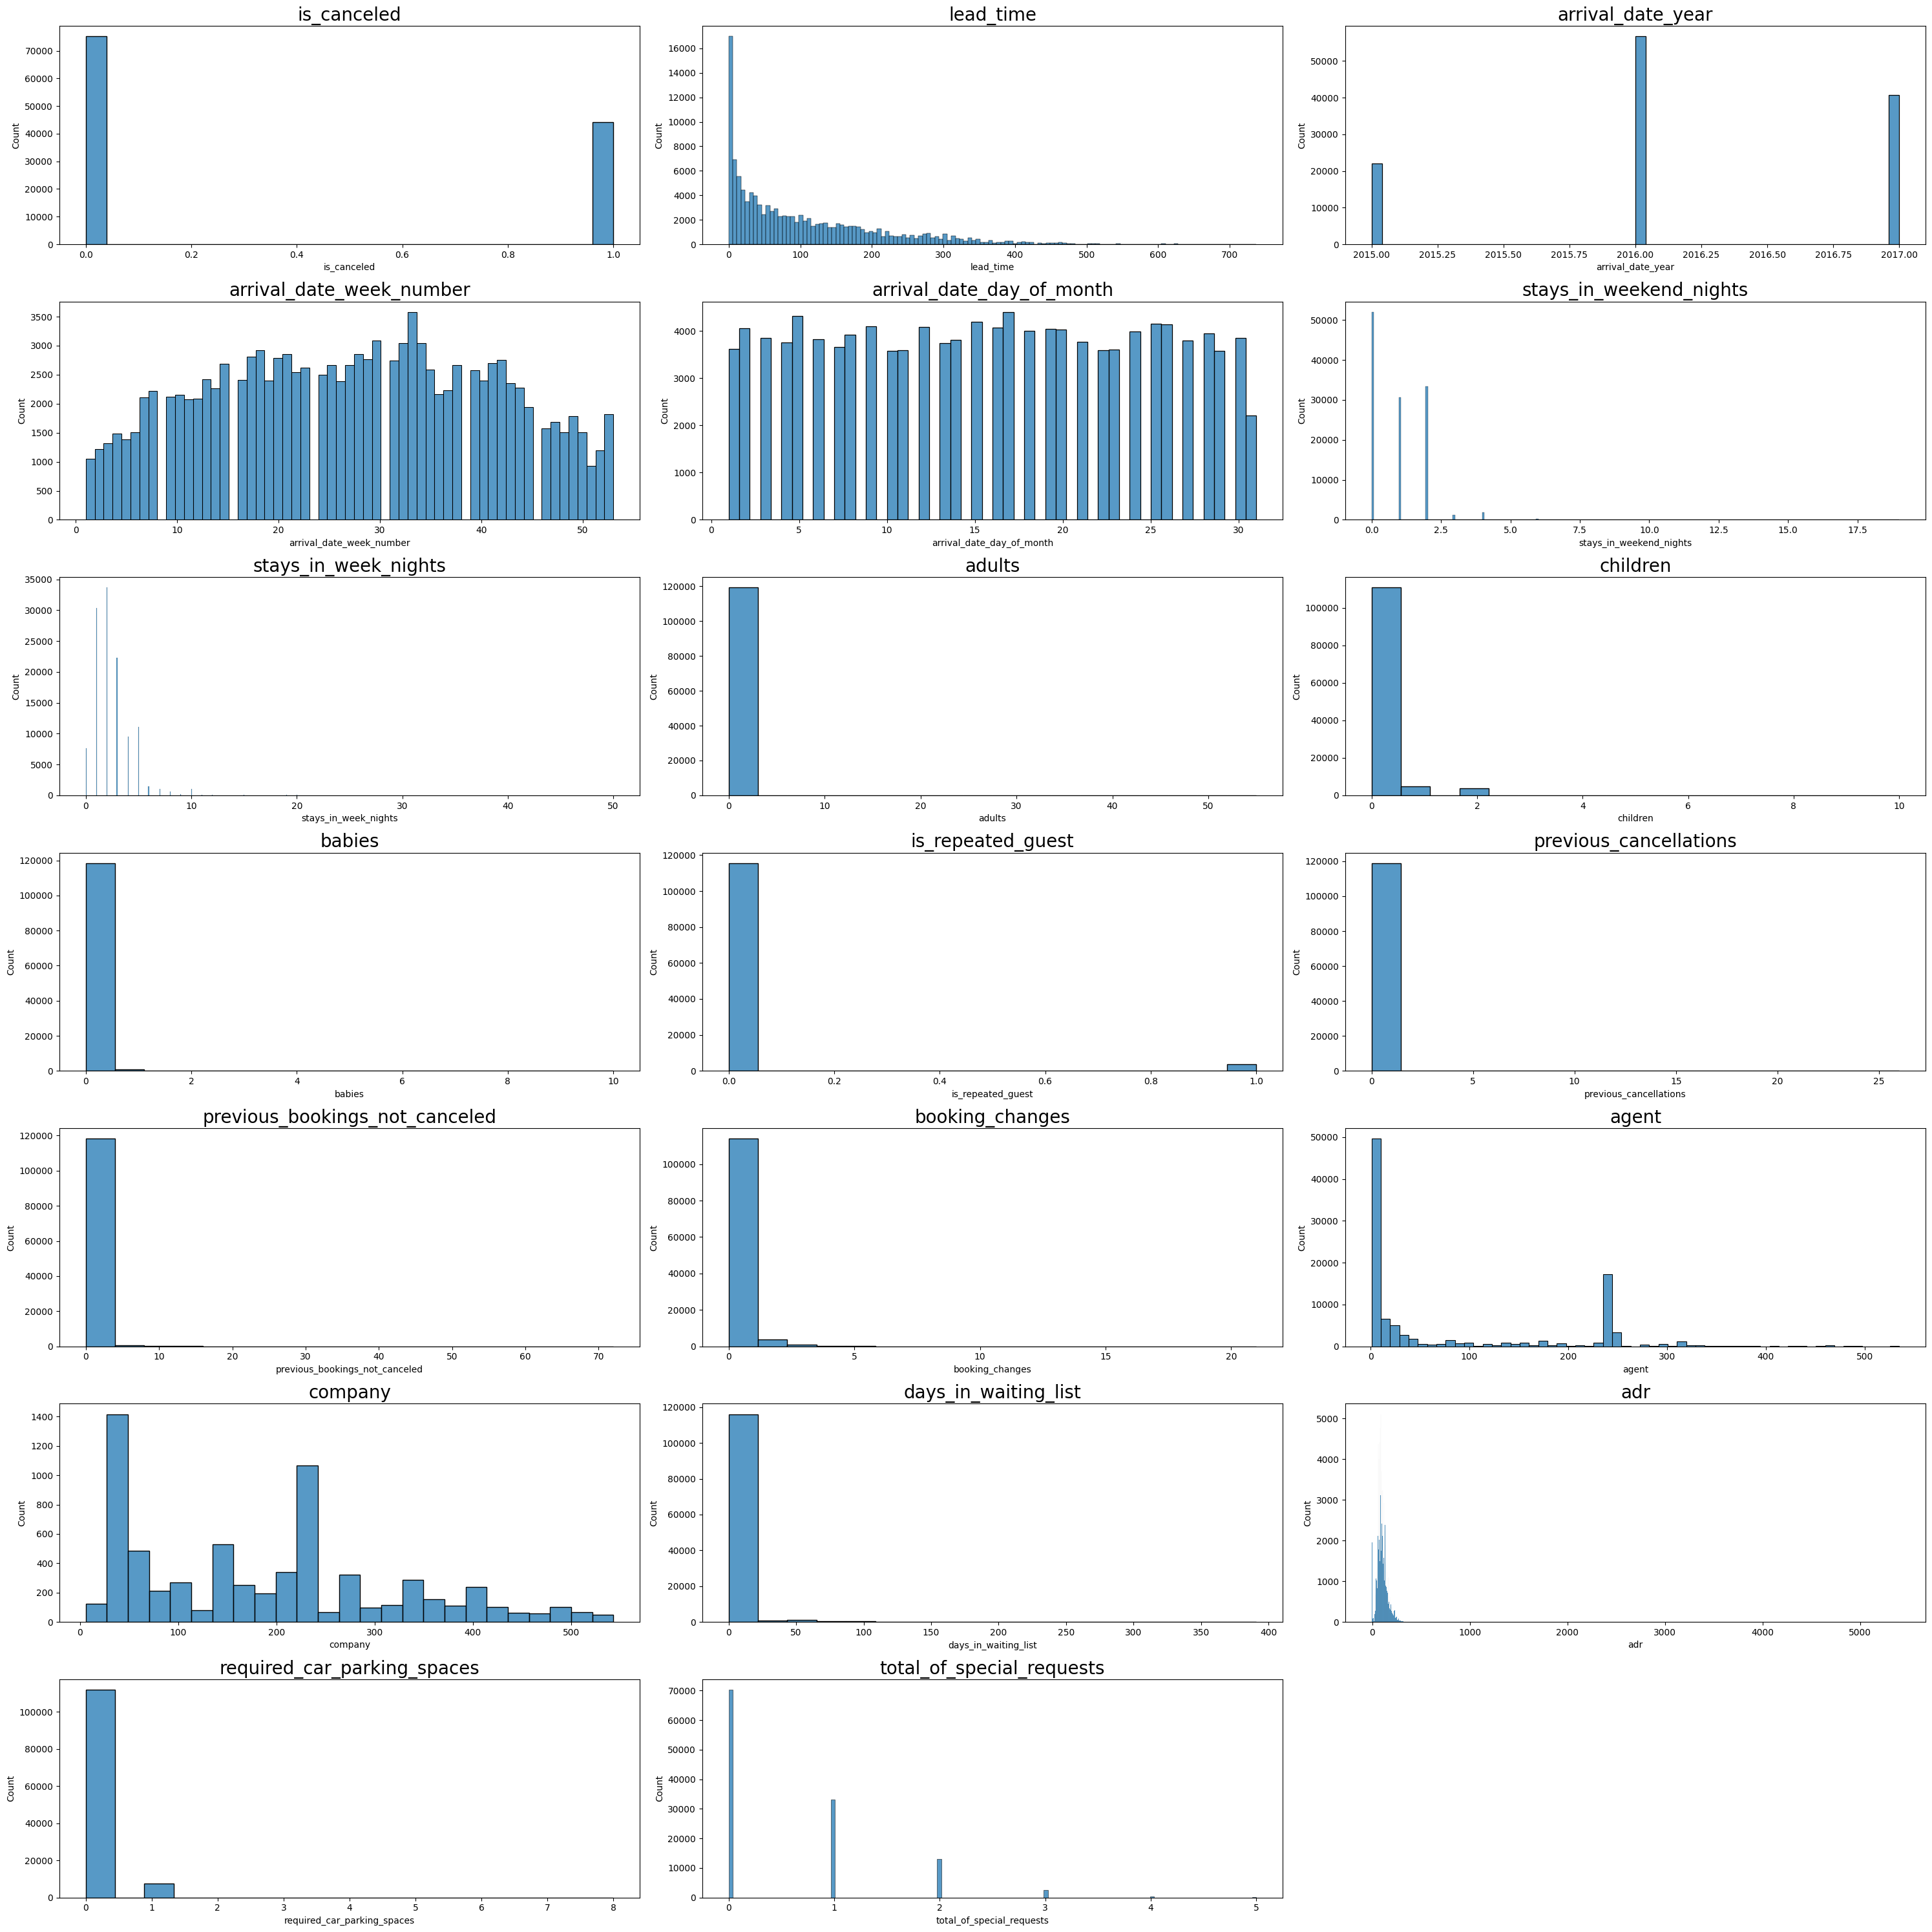

In [70]:
plt.figure(figsize=(30, 30))

for col in numerik.columns:
    plt.subplot(7, 3, numerik.columns.get_loc(col)+1)
    sns.histplot(data=df, x=col)
    plt.title(col, fontsize=20)
    plt.autoscale()

plt.tight_layout()
plt.show()

#### Correlation

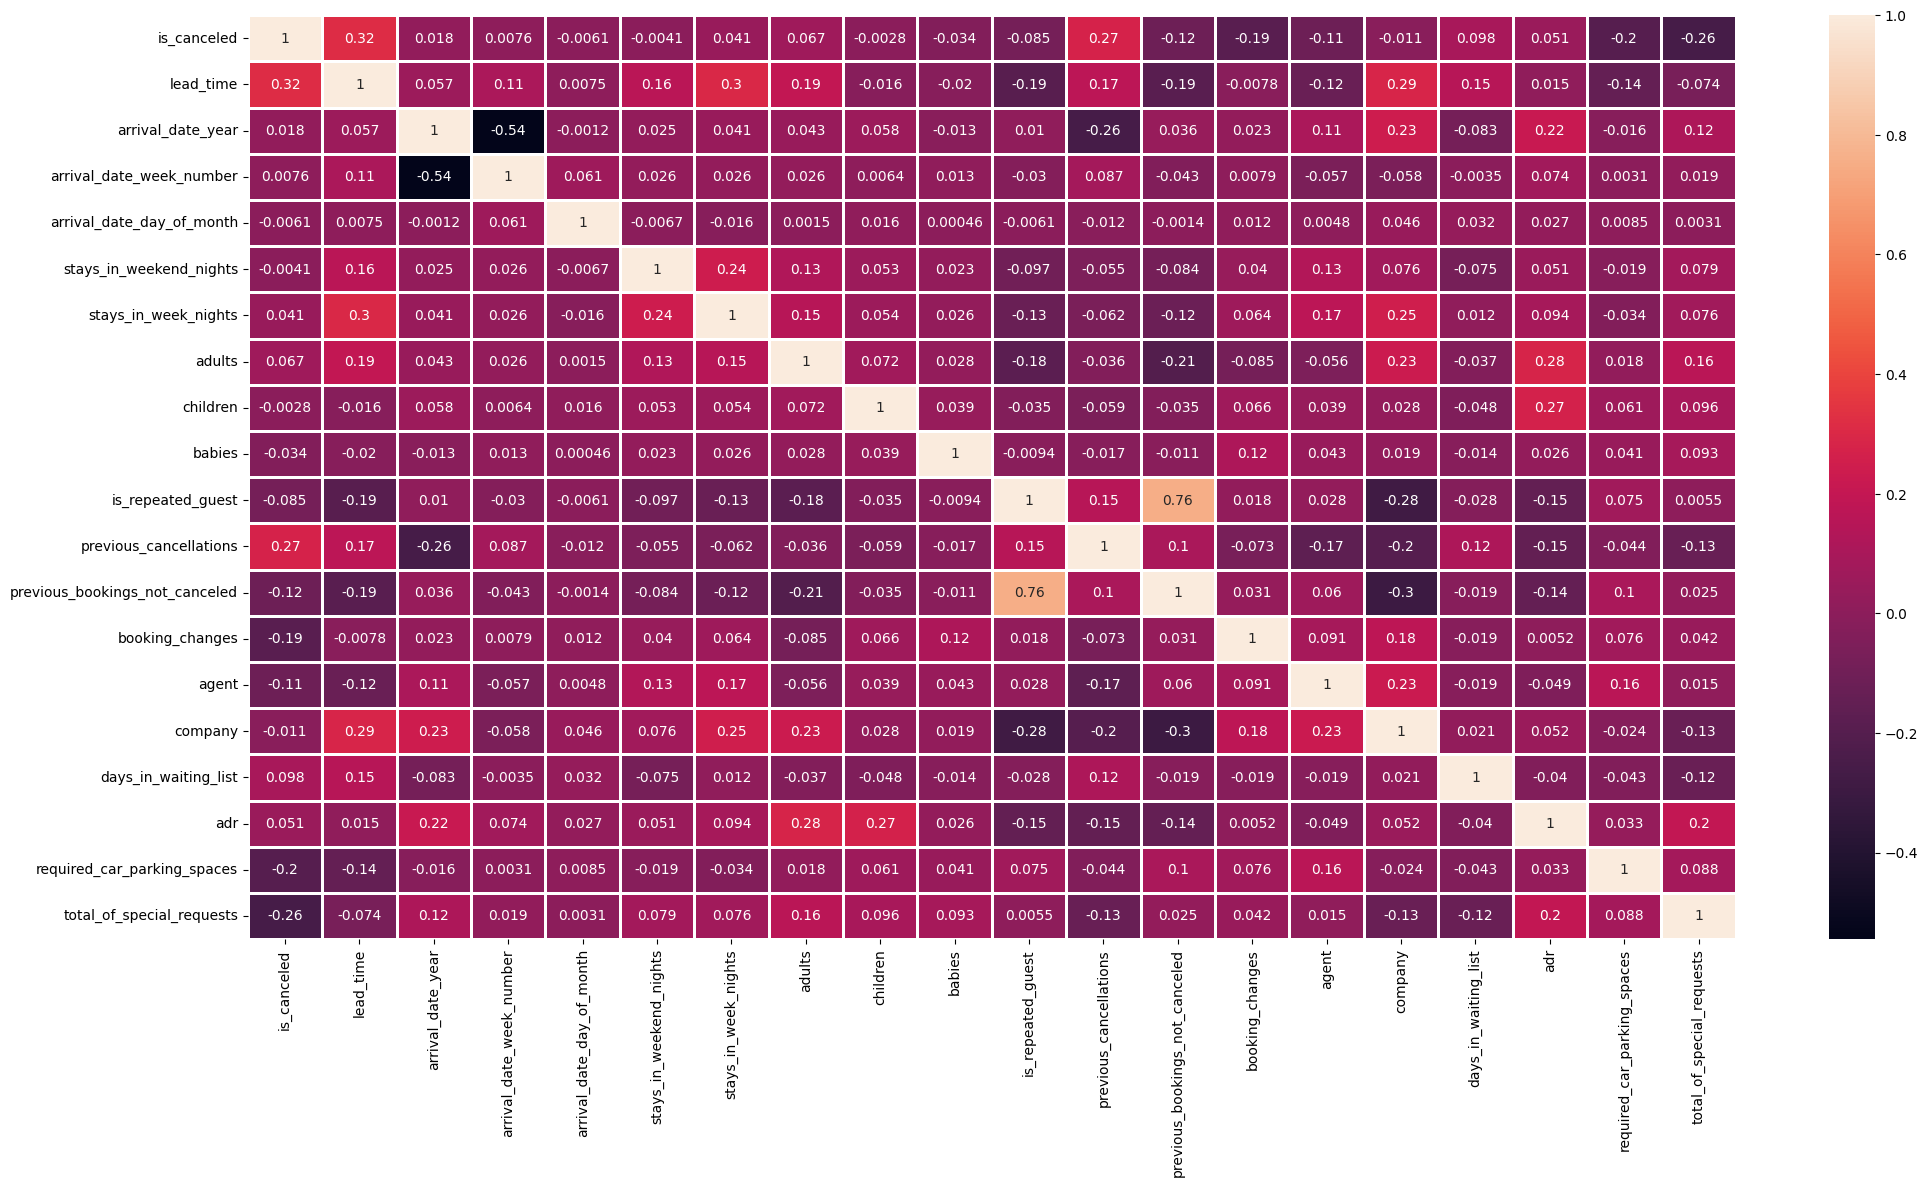

In [71]:
# Correlation Heatmap
plt.figure(figsize = (24, 12))

corr = numerik.corr(method='spearman')
sns.heatmap(corr, annot = True, linewidths = 1)
plt.show()

In [72]:
# Checking correlation with 'is_canceled'
result = {}
for col in numerik.columns :
  if col != 'is_canceled':
    valid_data = numerik[['is_canceled', col]].dropna().replace([np.inf, -np.inf], np.nan).dropna() #removing NaN & infinite values
    correlation, p_values = pointbiserialr(valid_data['is_canceled'],valid_data[col])
    result[col]=correlation

# Store the result in a dataframe
result_df = pd.DataFrame.from_dict(result, orient='index', columns=['Correlation'])
result_df['Absolute Correlation'] = result_df['Correlation'].abs()
result_df.sort_values(by='Absolute Correlation', ascending=False)

,Correlation,Absolute Correlation
lead_time,0.293123,0.293123
total_of_special_requests,-0.234658,0.234658
required_car_parking_spaces,-0.195498,0.195498
booking_changes,-0.144381,0.144381
previous_cancellations,0.110133,0.110133
is_repeated_guest,-0.084793,0.084793
agent,-0.083114,0.083114
adults,0.060017,0.060017
previous_bookings_not_canceled,-0.057358,0.057358
days_in_waiting_list,0.054186,0.054186


In [73]:
low_Corr = result_df[result_df['Absolute Correlation'] < 0.05].index

#### Outliers

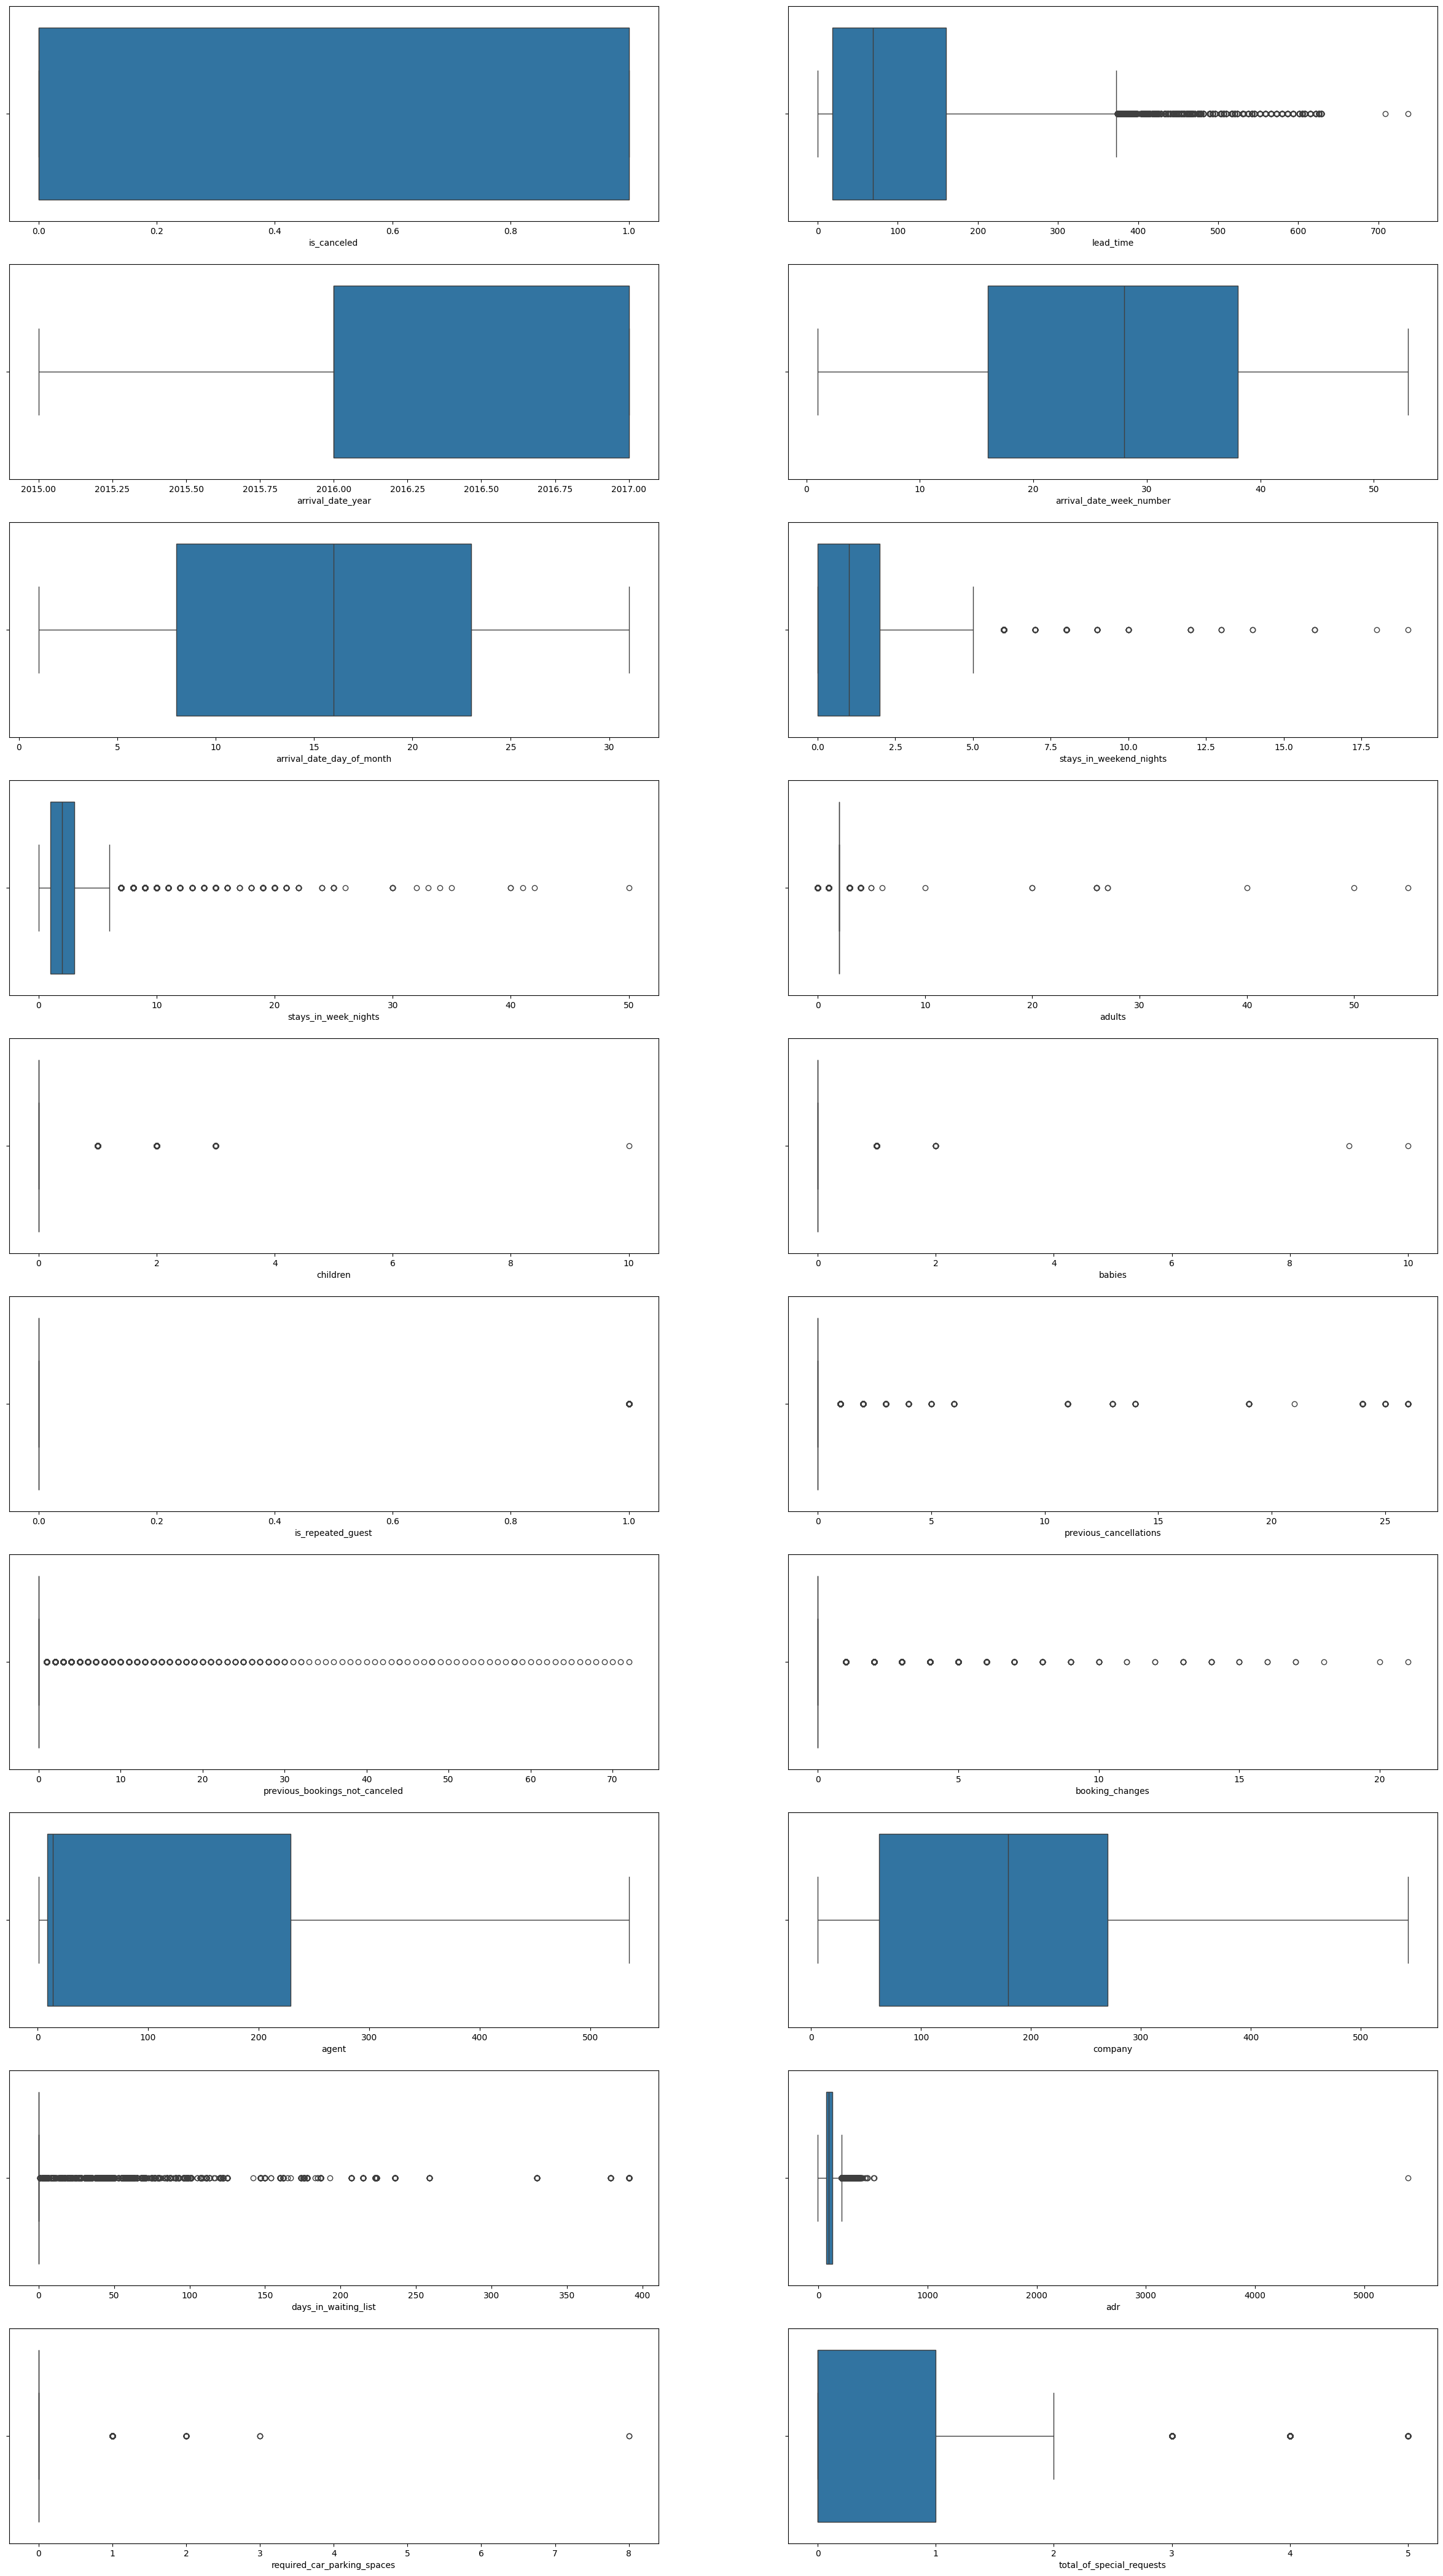

In [74]:
fig = plt.figure(figsize=(30,70))

count = 0
for kolom in numerik.columns :
    count+=1
    plt.subplot(13,2,count)
    sns.boxplot(numerik, x = kolom)
plt.show()

In [75]:
Q1 = numerik.quantile(0.25)
Q3 = numerik.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = ((numerik < lower_bound) | (numerik > upper_bound))

outlier_count = outliers.sum().sum()
print(f"Number of outliers: {outlier_count}")

outlier_rows = numerik[outliers.any(axis=1)]
print(outlier_rows)

outlier_count = outliers.sum()

print("Number of outliers in each column:")
print(outlier_count)

Number of outliers: 95615
        is_canceled  lead_time  arrival_date_year  arrival_date_week_number  \
0                 0        342               2015                        27   
1                 0        737               2015                        27   
2                 0          7               2015                        27   
3                 0         13               2015                        27   
12                0         68               2015                        27   
...             ...        ...                ...                       ...   
119376            0        165               2017                        35   
119382            0        135               2017                        35   
119386            0        102               2017                        35   
119387            0         34               2017                        35   
119389            0        205               2017                        35   

        arrival_date_day_

### Categorical Features

#### Unique Values

In [76]:
# printing unique values of each column
for col in kategorik.columns:
    print(f"{col}: \n{df[col].unique()}\n")

hotel: 
['Resort Hotel' 'City Hotel']

arrival_date_month: 
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']

meal: 
['BB' 'FB' 'HB' 'SC' 'Undefined']

country: 
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB'
 'CMR' 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'JOR' 'SYR' 'SGP' 'BDI'
 'SAU' 'VNM' 'PLW' 'QAT' 'EGY' 'PER' 'MLT' 'MWI' 'ECU' 'MDG' 'ISL' 'UZB'
 'NPL' 'BHS' 'MAC' 'TGO' 'TWN' 'DJI' 'STP' 'KNA

#### Most Frequent Categories (Top 5)

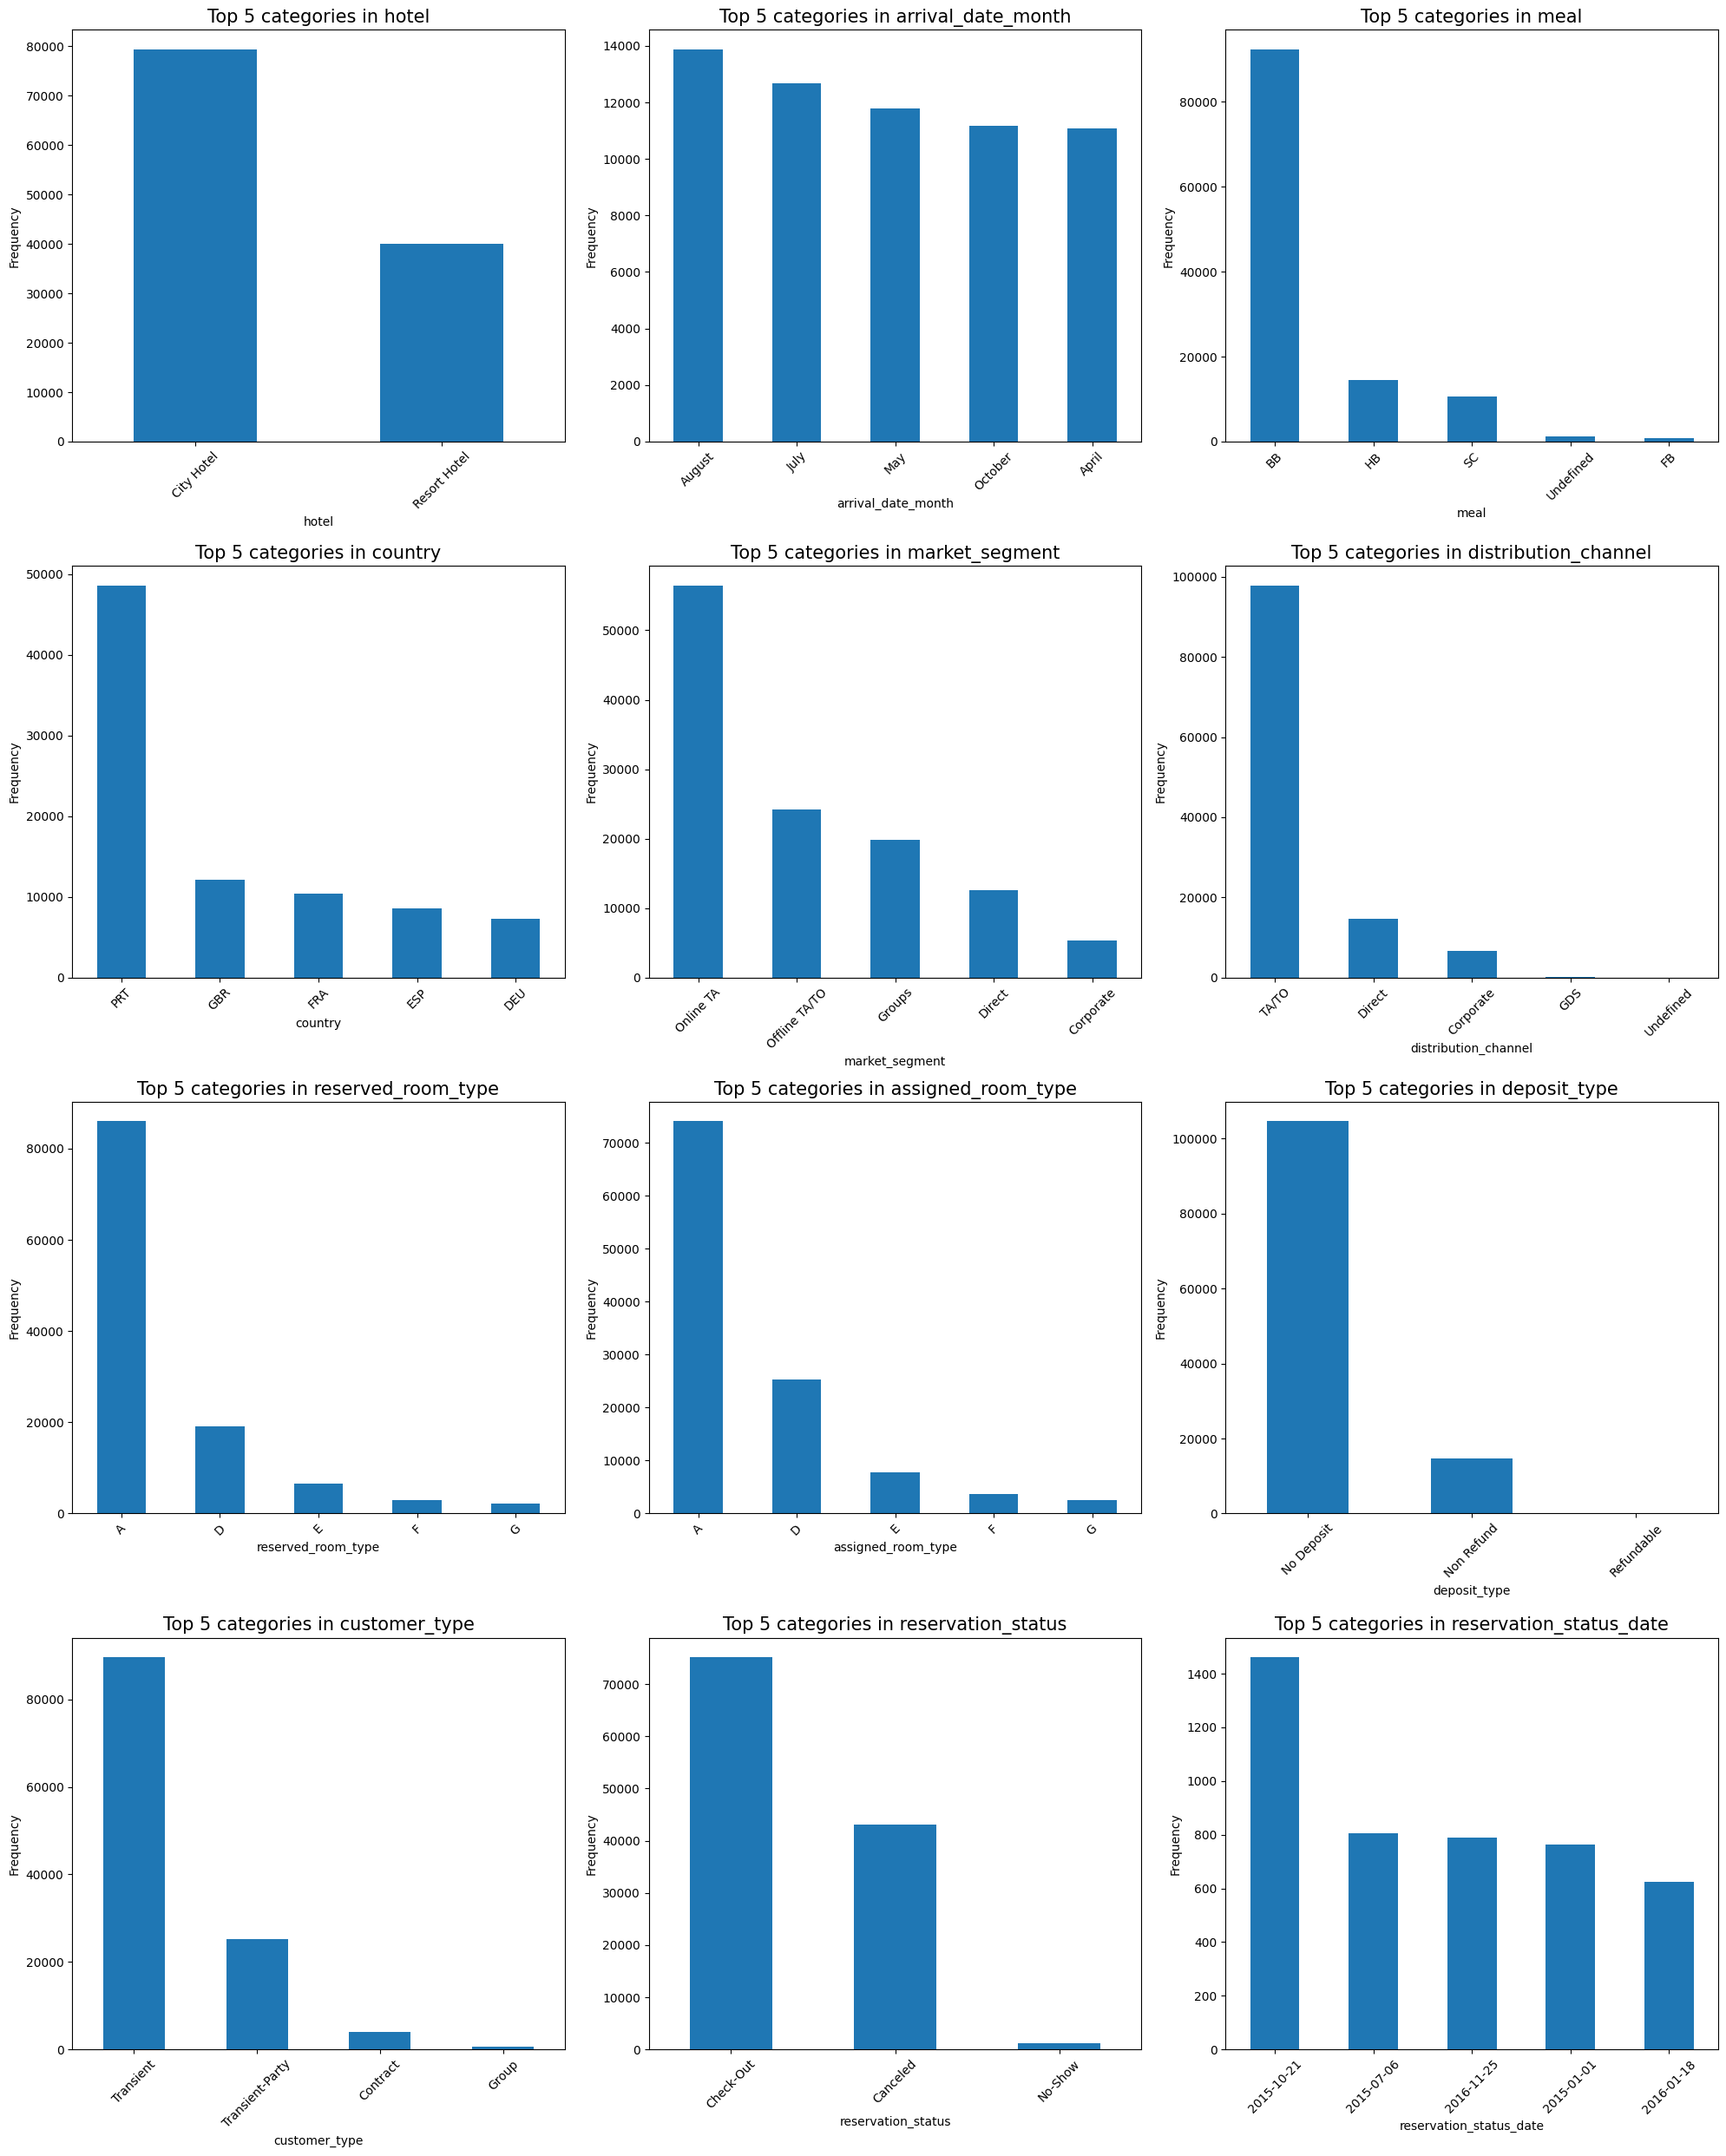

In [77]:
plt.figure(figsize=(20, 30))

for col in kategorik.columns:
    plt.subplot(5, 3, kategorik.columns.get_loc(col)+1)
    terbanyak = df[col].value_counts().nlargest(5)
    terbanyak.plot(kind='bar')
    plt.title(f'Top 5 categories in {col}', fontsize=15)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

### Data Imbalance

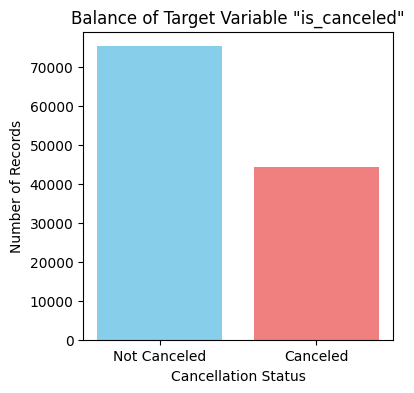

In [78]:
labels = ['Not Canceled', 'Canceled']
is_canceled = df['is_canceled'].value_counts()
colors = ['skyblue', 'lightcoral']

plt.figure(figsize=(4, 4))
plt.bar(labels, is_canceled, color=colors)
plt.xlabel('Cancellation Status')
plt.ylabel('Number of Records')
plt.title('Balance of Target Variable "is_canceled"')
plt.show()

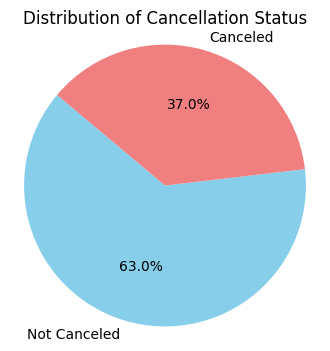

In [79]:
# Create pie chart
plt.figure(figsize=(4, 4))
plt.pie(is_canceled, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Cancellation Status')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

## Data Cleaning & Preprocessing

### Duplicated Data

In [80]:
df.shape

(119390, 32)

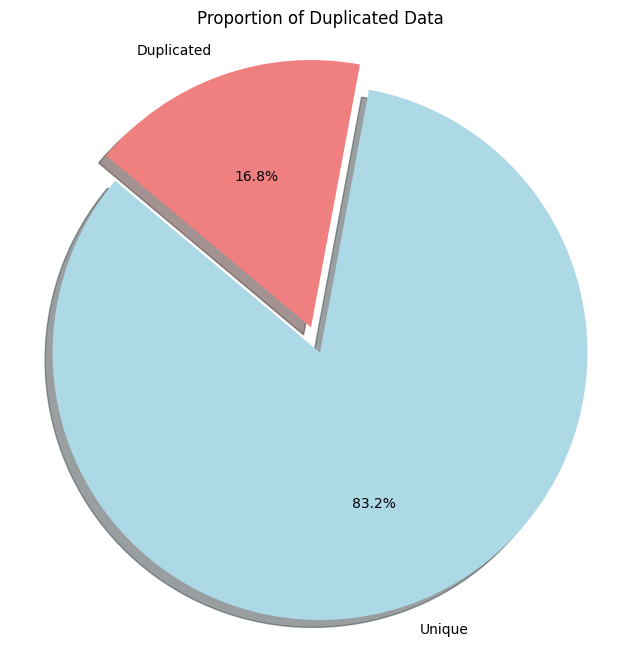

In [81]:
# Find duplicated rows
duplicated_rows = df[df.duplicated(keep=False)]

# Calculate the number of duplicated and unique rows
total_rows = len(df)
duplicated_count = len(duplicated_rows) / 2  # each duplicated row is counted twice
unique_count = total_rows - duplicated_count

# Pie chart data
labels = ['Unique', 'Duplicated']
sizes = [unique_count, duplicated_count]
colors = ['lightblue', 'lightcoral']
explode = (0.1, 0)  # explode the duplicated slice

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=140)
plt.title('Proportion of Duplicated Data')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [82]:
# Check for duplicated data
df.duplicated().sum()

31994

In [83]:
percentage_duplicates = (df.duplicated().sum() / len(df)) * 100
print(f'Percentage of duplicate rows: {percentage_duplicates:.2f}%')

Percentage of duplicate rows: 26.80%


In [84]:
duplicated_df = df[df.duplicated(keep=False)]

# Display the DataFrame with duplicated values
print("DataFrame with Duplicated Values:")
duplicated_df.head(20)

DataFrame with Duplicated Values:


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
21,Resort Hotel,0,72,2015,July,27,1,2,4,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,A,A,1,No Deposit,250.0,NaN,0,Transient,84.67,0,1,Check-Out,2015-07-07
22,Resort Hotel,0,72,2015,July,27,1,2,4,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,A,A,1,No Deposit,250.0,NaN,0,Transient,84.67,0,1,Check-Out,2015-07-07
39,Resort Hotel,0,70,2015,July,27,2,2,3,2,0.0,0,HB,ROU,Direct,Direct,0,0,0,E,E,0,No Deposit,250.0,NaN,0,Transient,137.00,0,1,Check-Out,2015-07-07
43,Resort Hotel,0,70,2015,July,27,2,2,3,2,0.0,0,HB,ROU,Direct,Direct,0,0,0,E,E,0,No Deposit,250.0,NaN,0,Transient,137.00,0,1,Check-Out,2015-07-07
132,Resort Hotel,1,5,2015,July,28,5,1,0,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,240.0,NaN,0,Transient,97.00,0,0,Canceled,2015-07-01
138,Resort Hotel,1,5,2015,July,28,5,1,0,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,240.0,NaN,0,Transient,97.00,0,0,Canceled,2015-07-01
198,Resort Hotel,0,0,2015,July,28,7,0,1,1,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,109.80,0,3,Check-Out,2015-07-08
200,Resort Hotel,0,0,2015,July,28,7,0,1,1,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,109.80,0,3,Check-Out,2015-07-08


In [85]:
df_noDupe = df.drop_duplicates()
df_noDupe = df_noDupe.reset_index(drop=True)

In [86]:
df_noDupe.shape

(87396, 32)

### Missing Data

The columns that contain missing values are children (0.004%), country (0.597%), agent (14,78%), and company (94,34%).

Because the column 'Company' mostly consists of missing values, the column could be dropped entirely because the data might not be sufficient to provide a meaningful conclusion or support the following analysis.

For the column 'Country', the rows of the missing value could be dropped because of such a low percentage that it may not significantly impact the quality of the overall analysis.

The missing values in the column 'Children' could be replaced with zero values, assuming a zero number of children.

The missing values in the column 'Agent' could be replaced with zero values, assuming that the bookings are made without any travel agencies.

In [87]:
missing_percentage = df_noDupe.isnull().mean() * 100
print(missing_percentage)

hotel                              0.000000
is_canceled                        0.000000
lead_time                          0.000000
arrival_date_year                  0.000000
arrival_date_month                 0.000000
arrival_date_week_number           0.000000
arrival_date_day_of_month          0.000000
stays_in_weekend_nights            0.000000
stays_in_week_nights               0.000000
adults                             0.000000
children                           0.004577
babies                             0.000000
meal                               0.000000
country                            0.517186
market_segment                     0.000000
distribution_channel               0.000000
is_repeated_guest                  0.000000
previous_cancellations             0.000000
previous_bookings_not_canceled     0.000000
reserved_room_type                 0.000000
assigned_room_type                 0.000000
booking_changes                    0.000000
deposit_type                    

In [88]:
df_noDupe.drop(columns=['company'], inplace=True)

In [89]:
miss = pd.DataFrame(df_noDupe.isnull().any(),columns = ['column'])
miss_col = miss[miss['column'] == True]

In [90]:
miss_col.index

Index(['children', 'country', 'agent'], dtype='object')

In [91]:
miss_col

,column
children,True
country,True
agent,True


In [92]:
for column in miss_col.index:
    # Check if the column exists before trying to fill missing values
    if column in df_noDupe.columns:
        df_noDupe[column] = df_noDupe[column].fillna(df_noDupe[column].mode()[0])
    else:
        print(f"Warning: Column '{column}' not found in DataFrame.")

In [93]:
df_noDupe['adr'].fillna(0)

0          0.00
1          0.00
2         75.00
3         75.00
4         98.00
          ...  
87391     96.14
87392    225.43
87393    157.71
87394    104.40
87395    151.20
Name: adr, Length: 87396, dtype: float64

In [94]:
# Remove float values from the column 'country'
df_noDupe = df_noDupe[~df_noDupe['country'].apply(lambda x: isinstance(x, float))]

In [95]:
df_noDupe.isin(['Undefined']).sum().sort_values(ascending = False)

meal                              492
distribution_channel                5
market_segment                      2
previous_cancellations              0
reservation_status                  0
total_of_special_requests           0
required_car_parking_spaces         0
adr                                 0
customer_type                       0
days_in_waiting_list                0
agent                               0
deposit_type                        0
booking_changes                     0
assigned_room_type                  0
reserved_room_type                  0
previous_bookings_not_canceled      0
hotel                               0
is_repeated_guest                   0
is_canceled                         0
country                             0
babies                              0
children                            0
adults                              0
stays_in_week_nights                0
stays_in_weekend_nights             0
arrival_date_day_of_month           0
arrival_date

In [96]:
# Replacing 'Undefined' values in meal column
df_noDupe['meal'].replace('Undefined','SC', inplace=True)

# Dropping 'Undefined' values in distribution_channel and market_segment column
df_noDupe.drop(df_noDupe[df_noDupe['market_segment'] == 'Undefined'].index, inplace=True)
df_noDupe.drop(df_noDupe[df_noDupe['distribution_channel'] == 'Undefined'].index, inplace=True)

In [97]:
df_noDupe.isin(['Undefined']).sum().sort_values(ascending = False)

hotel                             0
is_repeated_guest                 0
reservation_status                0
total_of_special_requests         0
required_car_parking_spaces       0
adr                               0
customer_type                     0
days_in_waiting_list              0
agent                             0
deposit_type                      0
booking_changes                   0
assigned_room_type                0
reserved_room_type                0
previous_bookings_not_canceled    0
previous_cancellations            0
distribution_channel              0
is_canceled                       0
market_segment                    0
country                           0
meal                              0
babies                            0
children                          0
adults                            0
stays_in_week_nights              0
stays_in_weekend_nights           0
arrival_date_day_of_month         0
arrival_date_week_number          0
arrival_date_month          

The columns that contain 'Undefined' values are 'meal', 'distribution_channel', and 'market_segment'.

The 'Undefined' values in the meal column could be replaced with SC as it represents the same meaning.

The 'Undefined' values in the distribution_channel and market_segment could be dropped as they only exist in such a low percentage within the column.

### Data Outliers

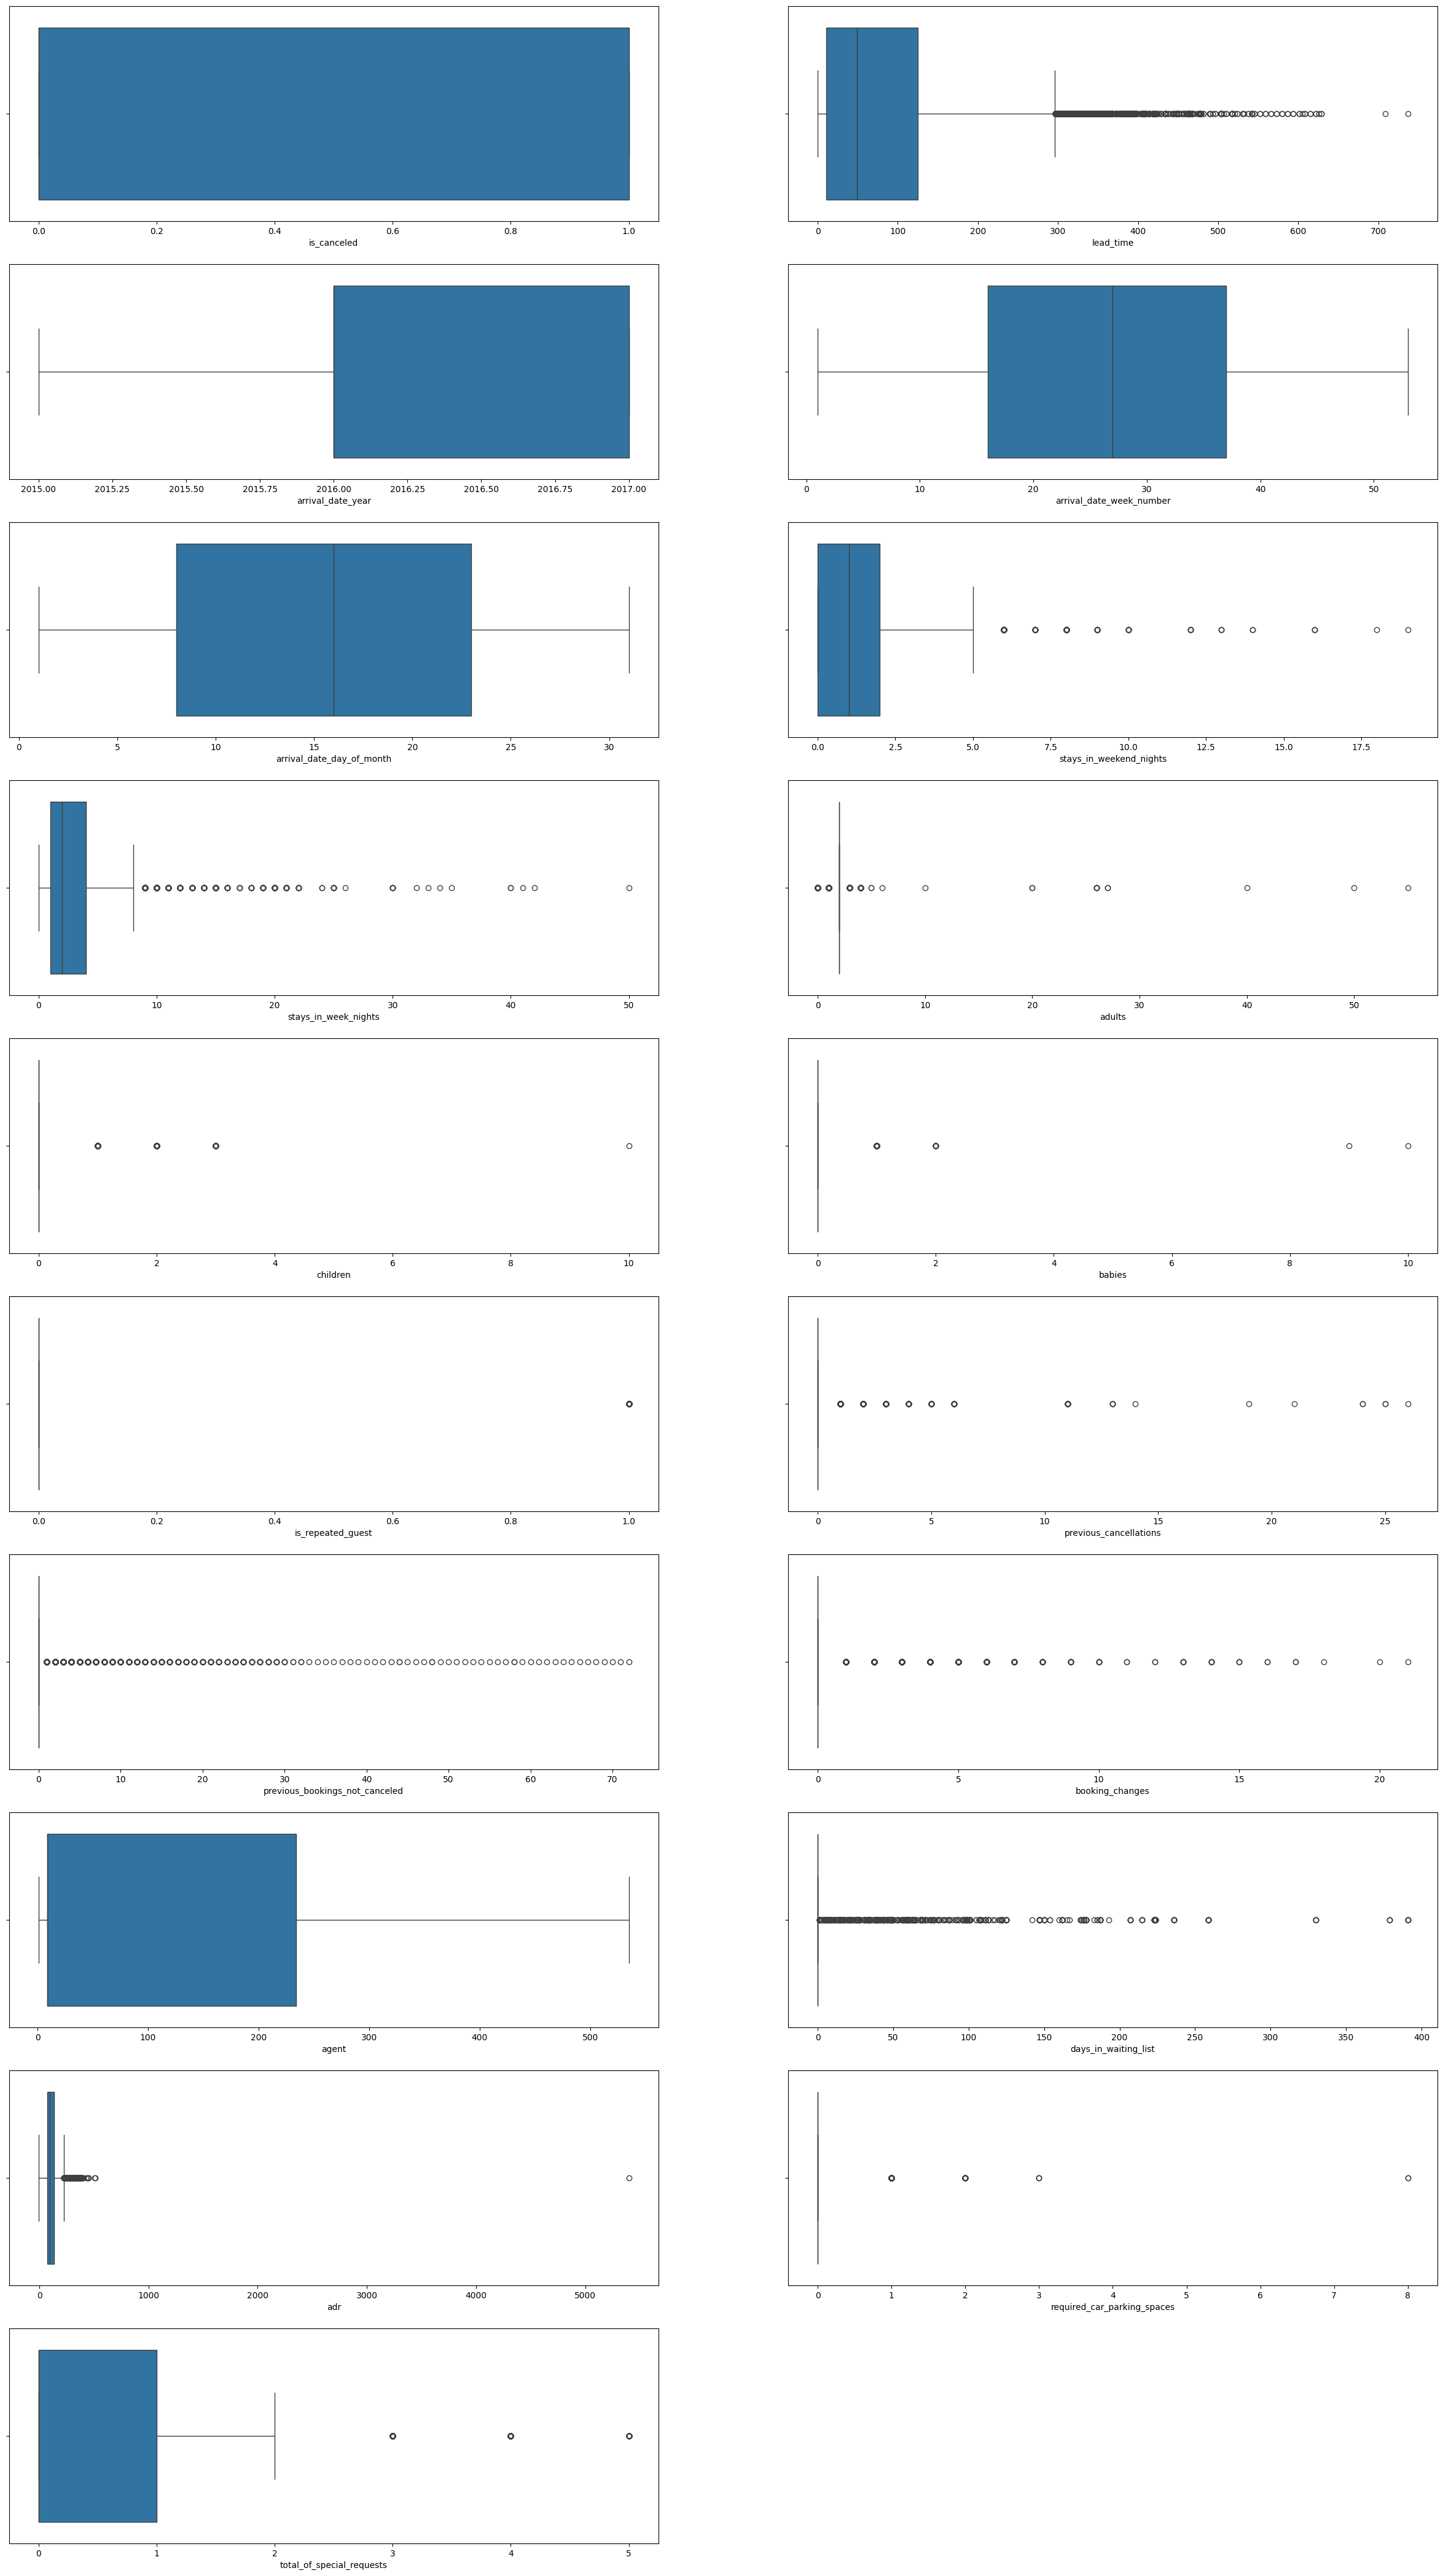

In [98]:
# Showing boxplot to identify outliers
numerik =  df_noDupe.select_dtypes(include=['int64','float64'])

fig = plt.figure(figsize=(30,70)) # horizontal, vertikal

count = 0
for kolom in numerik.columns :
    count+=1
    plt.subplot(13,2,count)
    sns.boxplot(numerik, x = kolom)
plt.show()

In [99]:
def calculate_outliers_percentage(df):
    outliers_percentage = {}

    for column in df_noDupe.select_dtypes(include=['number']).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df_noDupe[(df_noDupe[column] < lower_bound) | (df_noDupe[column] > upper_bound)]
        outliers_percentage[column] = len(outliers) / len(df) * 100

    return outliers_percentage

# Calculate the percentage of outliers for each column
outliers_percentage = calculate_outliers_percentage(df)

# Create a DataFrame to display the results in a table
outliers_df = pd.DataFrame(outliers_percentage.items(), columns=['Column', 'Outlier Percentage'])

# Print the DataFrame
display(outliers_df.sort_values(by='Outlier Percentage', ascending=False))

,Column,Outlier Percentage
7,adults,19.179161
13,booking_changes,13.319373
8,children,7.004774
17,required_car_parking_spaces,6.124466
16,adr,3.032917
12,previous_bookings_not_canceled,2.969260
10,is_repeated_guest,2.860374
6,stays_in_week_nights,2.605746
18,total_of_special_requests,2.238881
11,previous_cancellations,1.411341


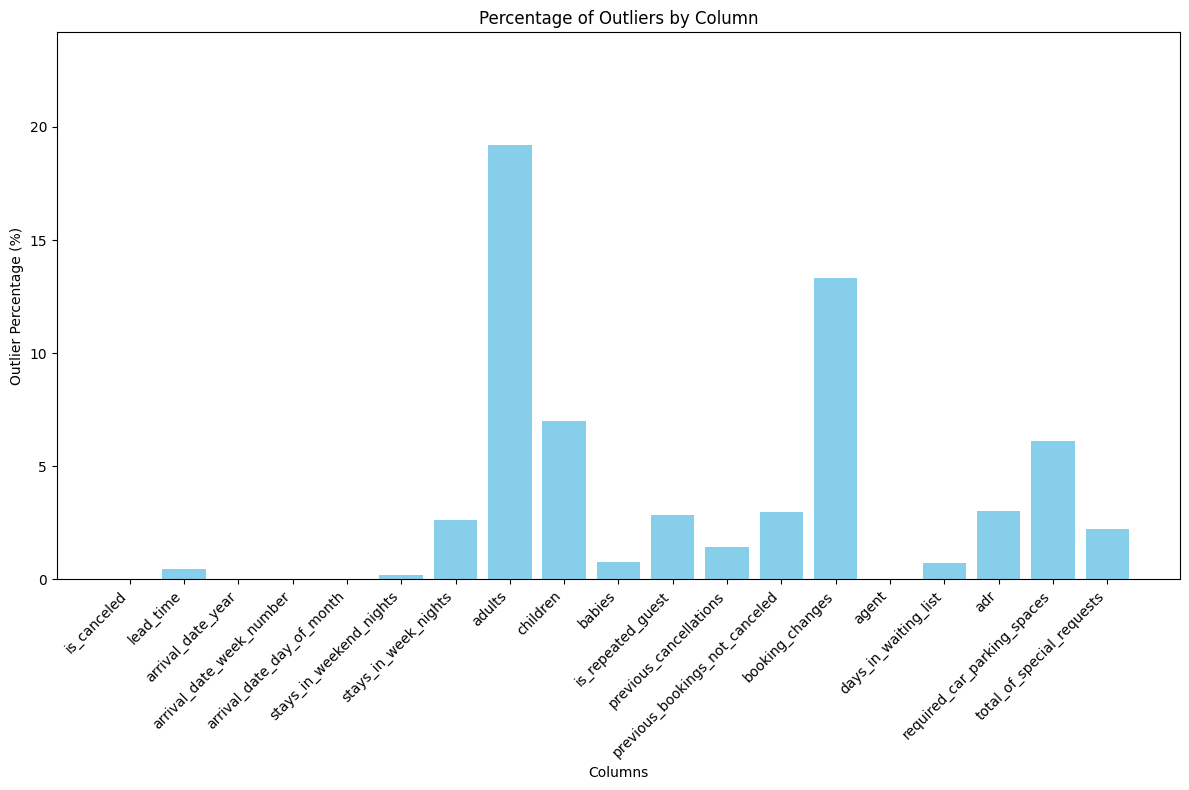

In [100]:
# Create a bar graph for outliers percentage
plt.figure(figsize=(12, 8))
plt.bar(outliers_df['Column'], outliers_df['Outlier Percentage'], color='skyblue')
plt.xlabel('Columns')
plt.ylabel('Outlier Percentage (%)')
plt.title('Percentage of Outliers by Column')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, max(outliers_df['Outlier Percentage']) + 5)  # Adding some padding to the y-axis

# Display the graph
plt.tight_layout()
plt.show()

In [101]:
numerik =  df_noDupe.select_dtypes(include=['int64','float64'])

Q1 = numerik.quantile(0.25)
Q3 = numerik.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = ((numerik < lower_bound) | (numerik > upper_bound))

outlier_count = outliers.sum().sum()
# print("----------------------------------------------------------------------------------------------------")
print(f"Number of outliers: {outlier_count}")

# outlier_rows = numerik[outliers.any(axis=1)]
# print("----------------------------------------------------------------------------------------------------")
# print(outlier_rows)

outlier_count = outliers.sum()


print("----------------------------------------------------------------------------------------------------")
print("Number of outliers in each column:")
print(outlier_count)

Number of outliers: 74204
----------------------------------------------------------------------------------------------------
Number of outliers in each column:
is_canceled                           0
lead_time                          2396
arrival_date_year                     0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights             220
stays_in_week_nights               1531
adults                            22898
children                           8363
babies                              914
is_repeated_guest                  3415
previous_cancellations             1685
previous_bookings_not_canceled     3545
booking_changes                   15902
agent                                 0
days_in_waiting_list                860
adr                                2490
required_car_parking_spaces        7312
total_of_special_requests          2673
dtype: int64


#### Impute outliers value using median

In [102]:
df_noDupes = df_noDupe.copy()

In [103]:
def impute_outliers_with_median(numerik):
    for column in df_noDupe.select_dtypes(include=['int64','float64']).columns:
        Q1 = df_noDupe[column].quantile(0.25)
        Q3 = df_noDupe[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        median = df_noDupe[column].median()

        # Replace outliers with median
        df_noDupe[column] = df_noDupe[column].apply(lambda x: median if x < lower_bound or x > upper_bound else x)
        df_Clean = df_noDupe

    return df_Clean

# Impute outliers with median
df_Clean = impute_outliers_with_median(df_noDupe)

# Print the imputed DataFrame
print(df_Clean)

              hotel  is_canceled  lead_time  arrival_date_year  \
0      Resort Hotel            0       49.0               2015   
1      Resort Hotel            0       49.0               2015   
2      Resort Hotel            0        7.0               2015   
3      Resort Hotel            0       13.0               2015   
4      Resort Hotel            0       14.0               2015   
...             ...          ...        ...                ...   
87391    City Hotel            0       23.0               2017   
87392    City Hotel            0      102.0               2017   
87393    City Hotel            0       34.0               2017   
87394    City Hotel            0      109.0               2017   
87395    City Hotel            0      205.0               2017   

      arrival_date_month  arrival_date_week_number  arrival_date_day_of_month  \
0                   July                        27                          1   
1                   July                     

In [104]:
def calculate_outliers_percentage(df):
    outliers_percentage = {}

    for column in df_noDupe.select_dtypes(include=['number']).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df_noDupe[(df_noDupe[column] < lower_bound) | (df_noDupe[column] > upper_bound)]
        outliers_percentage[column] = len(outliers) / len(df) * 100

    return outliers_percentage

# Calculate the percentage of outliers for each column
outliers_percentage = calculate_outliers_percentage(df_noDupe)

# Create a DataFrame to display the results in a table
outliers_df = pd.DataFrame(outliers_percentage.items(), columns=['Column', 'Outlier Percentage'])

# Print the DataFrame
print(outliers_df)

                            Column  Outlier Percentage
0                      is_canceled            0.000000
1                        lead_time            1.461249
2                arrival_date_year            0.000000
3         arrival_date_week_number            0.000000
4        arrival_date_day_of_month            0.000000
5          stays_in_weekend_nights            0.000000
6             stays_in_week_nights            1.807966
7                           adults            0.000000
8                         children            0.000000
9                           babies            0.000000
10               is_repeated_guest            0.000000
11          previous_cancellations            0.000000
12  previous_bookings_not_canceled            0.000000
13                 booking_changes            0.000000
14                           agent            0.000000
15            days_in_waiting_list            0.000000
16                             adr            1.017267
17     req

### Remove unimportant column based on correlation

In [105]:
low_Corr = result_df[result_df['Absolute Correlation'] < 0.05].index
low_Corr

Index(['arrival_date_year', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'children', 'babies', 'company', 'adr'],
      dtype='object')

if error comment this code below

In [106]:
# def delete_string_from_index(index, string_to_delete):
#     # Convert the Index to a list
#     index_list = index.tolist()

#     # Remove the string if it exists in the list
#     if string_to_delete in index_list:
#         index_list.remove(string_to_delete)
#         # Convert the list back to an Index
#         return pd.Index(index_list)
#     else:
#        print("'{string_to_delete}' not found in the Index.")

# low_Corr = delete_string_from_index(low_Corr, "company")


In [107]:
df_noCol = df_Clean.drop(low_Corr, axis=1)

Index(['arrival_date_year', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'children', 'babies', 'adr'],
      dtype='object')

In [110]:
df_noCol.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_month', 'adults',
       'meal', 'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'days_in_waiting_list', 'customer_type', 'required_car_parking_spaces',
       'total_of_special_requests', 'reservation_status',
       'reservation_status_date'],
      dtype='object')

### Changing column data types

column reservation_status_date is in

In [111]:
df_noCol['reservation_status_date'] = pd.to_datetime(df_noCol['reservation_status_date'])
df_Clean['reservation_status_date'] = pd.to_datetime(df_Clean['reservation_status_date'])
df_noDupe['reservation_status_date'] = pd.to_datetime(df_noDupe['reservation_status_date'])

In [112]:
df_noCol['reservation_status_date'].dt.month

0        7
1        7
2        7
3        7
4        7
        ..
87391    9
87392    9
87393    9
87394    9
87395    9
Name: reservation_status_date, Length: 87391, dtype: int32

In [113]:
df_noCol['reservation_status_date'].dt.year

0        2015
1        2015
2        2015
3        2015
4        2015
         ... 
87391    2017
87392    2017
87393    2017
87394    2017
87395    2017
Name: reservation_status_date, Length: 87391, dtype: int32

In [114]:
df_noCol['country'] = df_noCol['country'].astype(str)

## Data Analysis

 The distribution analysis between canceled and non-canceled bookings for each features

#### Categorical Features

In [115]:
kategorik = df_noCol.select_dtypes(include=['object'])
kategorik.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87391 entries, 0 to 87395
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   hotel                 87391 non-null  object
 1   arrival_date_month    87391 non-null  object
 2   meal                  87391 non-null  object
 3   country               87391 non-null  object
 4   market_segment        87391 non-null  object
 5   distribution_channel  87391 non-null  object
 6   reserved_room_type    87391 non-null  object
 7   assigned_room_type    87391 non-null  object
 8   deposit_type          87391 non-null  object
 9   customer_type         87391 non-null  object
 10  reservation_status    87391 non-null  object
dtypes: object(11)
memory usage: 8.0+ MB


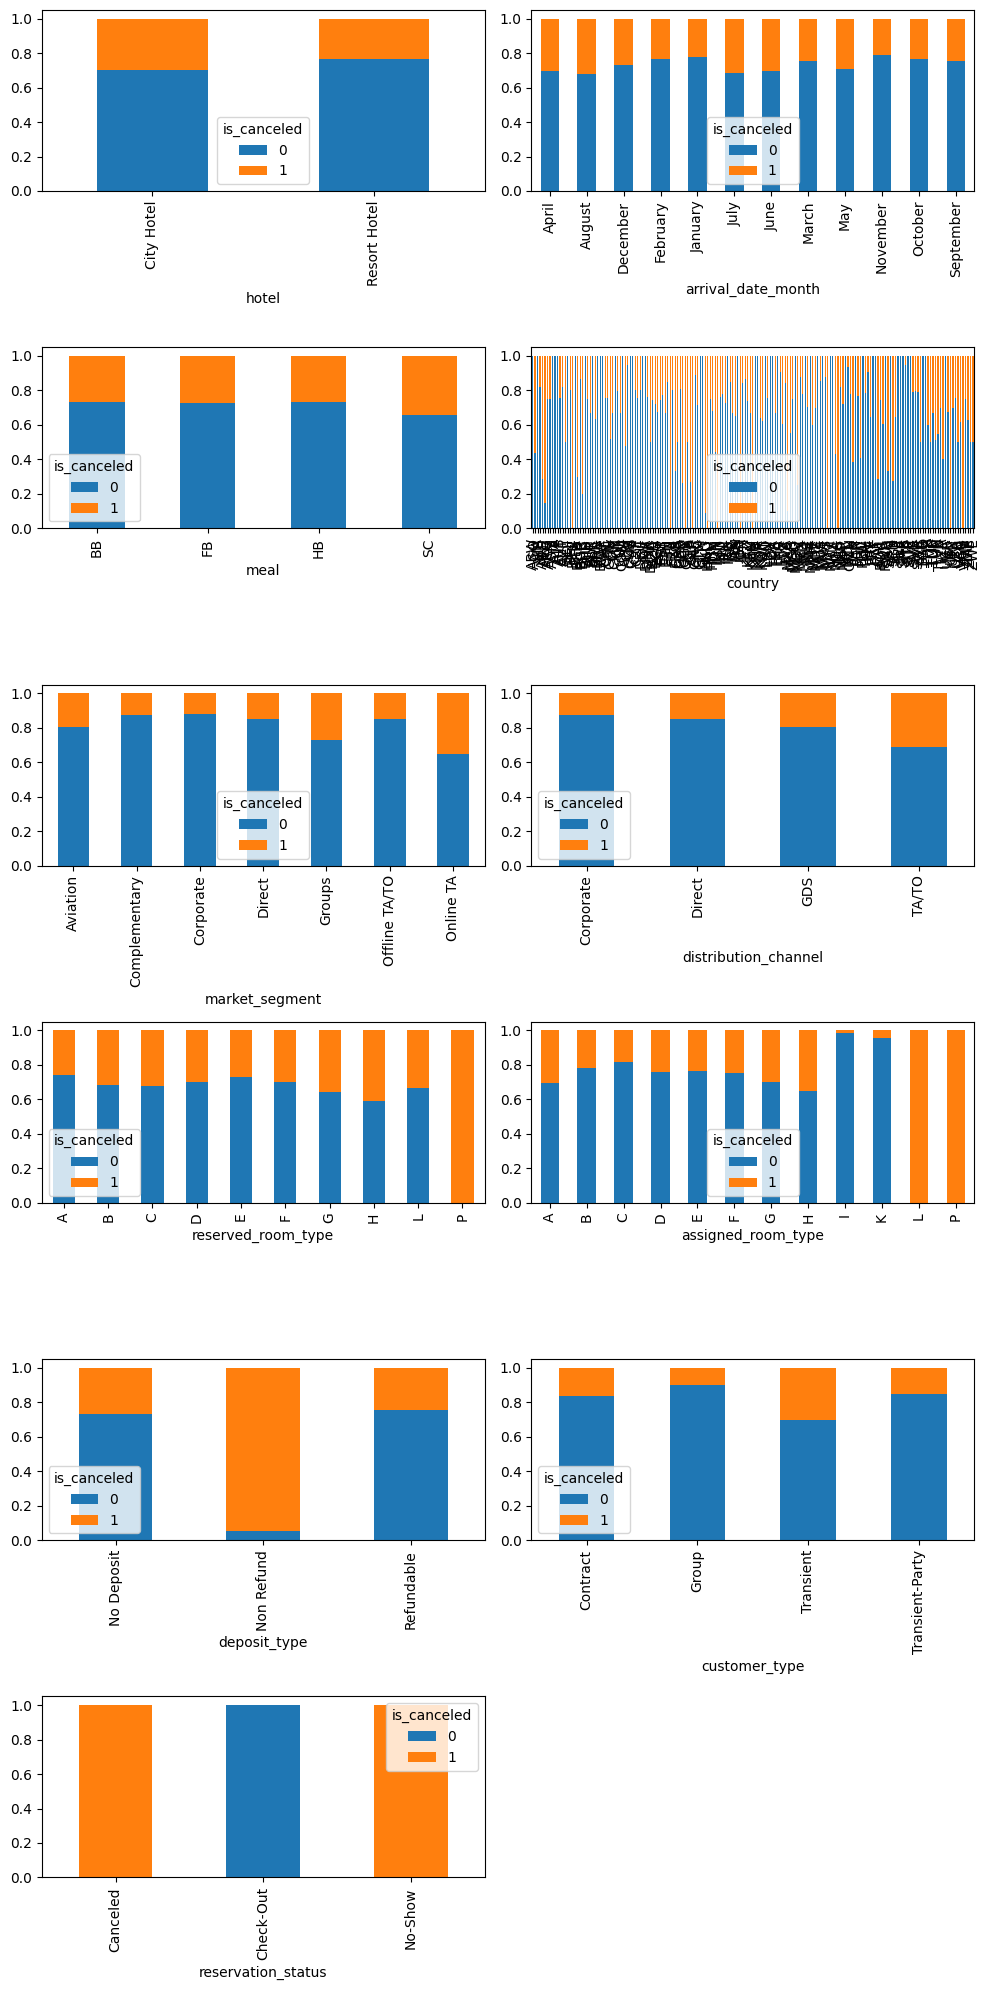

In [116]:
count = 0
fig = plt.figure(figsize=(10,20))

for i in kategorik.columns:
    count +=1
    ax= plt.subplot(6,2,count)
    pd.crosstab(df_noCol[i],df_noCol['is_canceled'],normalize=0).plot(kind='bar',stacked=True,ax=ax)
    fig.tight_layout()

plt.show()

In [117]:
for i in kategorik.columns:
    relevent_experience_df = df_noCol.groupby(i)['is_canceled'].value_counts(normalize=True).unstack()
    display(relevent_experience_df.sort_values(by=[1], ascending=False))
    print("-----------------------------------------------------------------------")

is_canceled,0,1
hotel,,
City Hotel,0.699667,0.300333
Resort Hotel,0.765184,0.234816


-----------------------------------------------------------------------


is_canceled,0,1
arrival_date_month,,
August,0.678397,0.321603
July,0.681981,0.318019
April,0.695372,0.304628
June,0.696845,0.303155
May,0.707720,0.292280
December,0.731436,0.268564
September,0.754559,0.245441
March,0.756422,0.243578
October,0.763196,0.236804


-----------------------------------------------------------------------


is_canceled,0,1
meal,,
SC,0.656172,0.343828
FB,0.725000,0.275000
HB,0.730295,0.269705
BB,0.734560,0.265440


-----------------------------------------------------------------------


is_canceled,0,1
country,,
NIC,NaN,1.0
BEN,NaN,1.0
GGY,NaN,1.0
GLP,NaN,1.0
HND,NaN,1.0
...,...,...
STP,1.0,NaN
SUR,1.0,NaN
SYR,1.0,NaN


-----------------------------------------------------------------------


is_canceled,0,1
market_segment,,
Online TA,0.646551,0.353449
Groups,0.729866,0.270134
Aviation,0.801762,0.198238
Offline TA/TO,0.851465,0.148535
Direct,0.852906,0.147094
Complementary,0.874644,0.125356
Corporate,0.878917,0.121083


-----------------------------------------------------------------------


is_canceled,0,1
distribution_channel,,
TA/TO,0.690314,0.309686
GDS,0.801105,0.198895
Direct,0.851786,0.148214
Corporate,0.872466,0.127534


-----------------------------------------------------------------------


is_canceled,0,1
reserved_room_type,,
P,NaN,1.000000
H,0.592282,0.407718
G,0.640838,0.359162
L,0.666667,0.333333
C,0.676503,0.323497
B,0.684422,0.315578
F,0.698548,0.301452
D,0.699046,0.300954
E,0.727393,0.272607


-----------------------------------------------------------------------


is_canceled,0,1
assigned_room_type,,
L,NaN,1.000000
P,NaN,1.000000
H,0.647309,0.352691
A,0.693773,0.306227
G,0.698559,0.301441
F,0.753515,0.246485
D,0.757891,0.242109
E,0.764003,0.235997
B,0.782489,0.217511


-----------------------------------------------------------------------


is_canceled,0,1
deposit_type,,
Non Refund,0.052987,0.947013
No Deposit,0.733182,0.266818
Refundable,0.757009,0.242991


-----------------------------------------------------------------------


is_canceled,0,1
customer_type,,
Transient,0.698937,0.301063
Contract,0.836891,0.163109
Transient-Party,0.847906,0.152094
Group,0.900735,0.099265


-----------------------------------------------------------------------


is_canceled,0,1
reservation_status,,
Canceled,NaN,1.0
No-Show,NaN,1.0
Check-Out,1.0,NaN


-----------------------------------------------------------------------


#### Numerical Features

In [118]:
numerik = df_noCol.select_dtypes(include=['int64','float64'])
numerik.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87391 entries, 0 to 87395
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   is_canceled                     87391 non-null  int64  
 1   lead_time                       87391 non-null  float64
 2   adults                          87391 non-null  float64
 3   is_repeated_guest               87391 non-null  float64
 4   previous_cancellations          87391 non-null  float64
 5   previous_bookings_not_canceled  87391 non-null  float64
 6   booking_changes                 87391 non-null  float64
 7   agent                           87391 non-null  float64
 8   days_in_waiting_list            87391 non-null  float64
 9   required_car_parking_spaces     87391 non-null  float64
 10  total_of_special_requests       87391 non-null  float64
dtypes: float64(10), int64(1)
memory usage: 8.0 MB


In [119]:
# The statistical summary of the customer who canceled their bookings
summary_stats = numerik.groupby('is_canceled').describe()

for col in numerik.columns:
    if col != 'is_canceled':
        print(f"Summary statistics for {col}:")
        print(summary_stats[col])
        print("\n")

Summary statistics for lead_time:
               count       mean        std  min   25%   50%    75%    max
is_canceled                                                              
0            63370.0  63.909815  70.375210  0.0   7.0  38.0  101.0  296.0
1            24021.0  91.869905  73.893938  0.0  32.0  69.0  142.0  296.0


Summary statistics for adults:
               count  mean  std  min  25%  50%  75%  max
is_canceled                                             
0            63370.0   2.0  0.0  2.0  2.0  2.0  2.0  2.0
1            24021.0   2.0  0.0  2.0  2.0  2.0  2.0  2.0


Summary statistics for is_repeated_guest:
               count  mean  std  min  25%  50%  75%  max
is_canceled                                             
0            63370.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
1            24021.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0


Summary statistics for previous_cancellations:
               count  mean  std  min  25%  50%  75%  max
is_canceled                    

## Data Preparation/Modelling and Evaluation

### Experimenting

the test will use Logistic Regression, KNN, Decision Tree, Random Forest, XGBoost, LightGBM.

the test will not use resampler

### Experiment 1

dataframe is clean, have outliers imputated with median, column below 0.05 correlation is deleted

#### Encoding

In [121]:
# Experiment 1
# Separating numerical and categorical features
numerik = df_noCol.select_dtypes(include=['int64', 'float64'])
kategorik = df_noCol.select_dtypes(include=['object'])

# Separating target features
num_features = numerik.columns.tolist()
num_features.remove('is_canceled')
cat_features = kategorik.columns.tolist()
cat_features.remove('reservation_status')

# Using onehotencoding and binaryencoding depending on the number of unique values in the features
unique_values = kategorik[cat_features].nunique()
binary_encod_features = unique_values[unique_values <= 5].index.tolist()
onehot_encod_features = unique_values[unique_values > 5].index.tolist()

# Defining preprocessing with ColumnTransformer
transformer = ColumnTransformer([
    ('robust', RobustScaler(), num_features),
    ('binary', BinaryEncoder(), binary_encod_features),
    ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore'), onehot_encod_features)
], remainder='passthrough')

# Splitting training and testing data
x = df_noCol.drop(['is_canceled', 'reservation_status', 'reservation_status_date'], axis=1)
y = df_noCol['is_canceled']

x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.6, random_state=0)

# Fit transformer & transform dataset
transformer.fit(x_train)

x_train_prep = transformer.transform(x_train)
x_test_prep = transformer.transform(x_test)

# Retrieve feature names from each transformer step
num_feature_names = transformer.transformers_[0][1].get_feature_names_out(num_features)
binary_feature_names = transformer.transformers_[1][1].get_feature_names()
onehot_feature_names = transformer.transformers_[2][1].get_feature_names_out(onehot_encod_features)

# Concatenate all feature names
features = list(num_feature_names) + list(binary_feature_names) + list(onehot_feature_names)

x_train_prep.columns = features
x_test_prep.columns = features

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/category_encoders/utils.py:366: FutureWarning: `get_feature_names` is deprecated in all of sklearn. Use `get_feature_names_out` instead.
  warnings.warn("`get_feature_names` is deprecated in all of sklearn. Use `get_feature_names_out` instead.",


In [122]:
len(x_train_prep.columns)

214

#### Modelling

In [123]:
from sklearn.neighbors import KNeighborsClassifier

#Defining models
logreg = LogisticRegression(max_iter=10000)
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
xgb = XGBClassifier()
lgbm = lgb.LGBMClassifier()

models = [logreg,knn,dt,rf,xgb,lgbm]


#------------------------------------------------------------------

#Train models
score=[]
rata=[]
std=[]


for model in models:
    skfold=StratifiedKFold(n_splits=5)
    estimator=Pipeline([('model',model)])
    model_cv=cross_val_score(estimator,x_train_prep,y_train,cv=skfold,scoring='recall')
    score.append(model_cv)
    rata.append(model_cv.mean())
    std.append(model_cv.std())

[LightGBM] [Info] Number of positive: 7686, number of negative: 20278
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007209 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 631
[LightGBM] [Info] Number of data points in the train set: 27964, number of used features: 96
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.274853 -> initscore=-0.970136
[LightGBM] [Info] Start training from score -0.970136
[LightGBM] [Info] Number of positive: 7687, number of negative: 20278
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007162 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 626
[LightGBM] [Info] Number of data points in the train set: 27965, number of used features: 95
[LightGBM] [Info] [bin

In [124]:
#Evaluating Recall value
result_noCol = pd.DataFrame({'model':['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost', 'LightGBM'],'Average Recall Value':rata,'Standard Deviation':std}).set_index('model').sort_values(by='Average Recall Value',ascending=False)
display(result_noCol)

,Average Recall Value,Standard Deviation
model,,
XGBoost,0.603037,0.013585
LightGBM,0.588673,0.017850
Decision Tree,0.556307,0.006990
Random Forest,0.548708,0.011364
KNN,0.506138,0.009624
Logistic Regression,0.362094,0.003330


### Experiment 2

dataframe have outliers imputated with median, have no missing values, and no duplicate

##### Encoding

In [126]:
# Experiment 2
# Separating numerical and categorical features
numerik = df_Clean.select_dtypes(include=['int64', 'float64'])
kategorik = df_Clean.select_dtypes(include=['object'])

# Separating target features
num_features = numerik.columns.tolist()
num_features.remove('is_canceled')
cat_features = kategorik.columns.tolist()
cat_features.remove('reservation_status')

# Using onehotencoding and binaryencoding depending on the number of unique values in the features
unique_values = kategorik[cat_features].nunique()
binary_encod_features = unique_values[unique_values <= 5].index.tolist()
onehot_encod_features = unique_values[unique_values > 5].index.tolist()

# Defining preprocessing with ColumnTransformer
transformer = ColumnTransformer([
    ('robust', RobustScaler(), num_features),
    ('binary', BinaryEncoder(), binary_encod_features),
    ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore'), onehot_encod_features)
], remainder='passthrough')

# Splitting training and testing data
x = df_Clean.drop(['is_canceled', 'reservation_status', 'reservation_status_date'], axis=1)
y = df_Clean['is_canceled']

x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.6, random_state=0)

# Fit transformer & transform dataset
transformer.fit(x_train)

x_train_prep = transformer.transform(x_train)
x_test_prep = transformer.transform(x_test)

# Retrieve feature names from each transformer step
num_feature_names = transformer.transformers_[0][1].get_feature_names_out(num_features)
binary_feature_names = transformer.transformers_[1][1].get_feature_names()
onehot_feature_names = transformer.transformers_[2][1].get_feature_names_out(onehot_encod_features)

# Concatenate all feature names
features = list(num_feature_names) + list(binary_feature_names) + list(onehot_feature_names)

x_train_prep.columns = features
x_test_prep.columns = features

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/category_encoders/utils.py:366: FutureWarning: `get_feature_names` is deprecated in all of sklearn. Use `get_feature_names_out` instead.
  warnings.warn("`get_feature_names` is deprecated in all of sklearn. Use `get_feature_names_out` instead.",


#### Modelling

In [127]:
from sklearn.neighbors import KNeighborsClassifier

#Defining models
logreg = LogisticRegression(max_iter=10000)
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
xgb = XGBClassifier()
lgbm = lgb.LGBMClassifier()

models = [logreg,knn,dt,rf,xgb,lgbm]


#------------------------------------------------------------------

#Train models
score=[]
rata=[]
std=[]

# smote = SMOTE(random_state=42)

for model in models:
    skfold=StratifiedKFold(n_splits=5)
    estimator=Pipeline([('model',model)])
    model_cv=cross_val_score(estimator,x_train_prep,y_train,cv=skfold,scoring='recall')
    score.append(model_cv)
    rata.append(model_cv.mean())
    std.append(model_cv.std())

[LightGBM] [Info] Number of positive: 7686, number of negative: 20278
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008323 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 988
[LightGBM] [Info] Number of data points in the train set: 27964, number of used features: 102
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.274853 -> initscore=-0.970136
[LightGBM] [Info] Start training from score -0.970136
[LightGBM] [Info] Number of positive: 7687, number of negative: 20278
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007519 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 983
[LightGBM] [Info] Number of data points in the train set: 27965, number of used features: 101
[LightGBM] [Info] [b

In [128]:
#Evaluating Recall value
result_Clean = pd.DataFrame({'model':['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost', 'LightGBM'],'Average Recall Value':rata,'Standard Deviation':std}).set_index('model').sort_values(by='Average Recall Value',ascending=False)
display(result_Clean)

,Average Recall Value,Standard Deviation
model,,
XGBoost,0.627495,0.016160
LightGBM,0.619898,0.013860
Decision Tree,0.581077,0.013422
Random Forest,0.536737,0.013501
KNN,0.495212,0.003876
Logistic Regression,0.382700,0.007386


### Experiment 3

dataframe only have duplicated data replaces, and no missing values

#### Encoding

In [130]:
# Experiment 2
# Separating numerical and categorical features
numerik = df_noDupes.select_dtypes(include=['int64', 'float64'])
kategorik = df_noDupes.select_dtypes(include=['object'])

# Separating target features
num_features = numerik.columns.tolist()
num_features.remove('is_canceled')
cat_features = kategorik.columns.tolist()
cat_features.remove('reservation_status')

# Using onehotencoding and binaryencoding depending on the number of unique values in the features
unique_values = kategorik[cat_features].nunique()
binary_encod_features = unique_values[unique_values <= 5].index.tolist()
onehot_encod_features = unique_values[unique_values > 5].index.tolist()

# Defining preprocessing with ColumnTransformer
transformer = ColumnTransformer([
    ('robust', RobustScaler(), num_features),
    ('binary', BinaryEncoder(), binary_encod_features),
    ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore'), onehot_encod_features)
], remainder='passthrough')

# Splitting training and testing data
x = df_noDupes.drop(['is_canceled', 'reservation_status', ], axis=1)
y = df_noDupes['is_canceled']

x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.6, random_state=0)

# Fit transformer & transform dataset
transformer.fit(x_train)

x_train_prep = transformer.transform(x_train)
x_test_prep = transformer.transform(x_test)

# Retrieve feature names from each transformer step
num_feature_names = transformer.transformers_[0][1].get_feature_names_out(num_features)
binary_feature_names = transformer.transformers_[1][1].get_feature_names()
onehot_feature_names = transformer.transformers_[2][1].get_feature_names_out(onehot_encod_features)

# Concatenate all feature names
features = list(num_feature_names) + list(binary_feature_names) + list(onehot_feature_names)

x_train_prep.columns = features
x_test_prep.columns = features

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [1, 5] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/category_encoders/utils.py:366: FutureWarning: `get_feature_names` is deprecated in all of sklearn. Use `get_feature_names_out` instead.
  warnings.warn("`get_feature_names` is deprecated in all of sklearn. Use `get_feature_names_out` instead.",


#### Modelling

In [131]:
from sklearn.neighbors import KNeighborsClassifier

#Defining models
logreg = LogisticRegression(max_iter=10000)
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
xgb = XGBClassifier()
lgbm = lgb.LGBMClassifier()

models = [logreg,knn,dt,rf,xgb,lgbm]


#------------------------------------------------------------------

#Train models
score=[]
rata=[]
std=[]

# smote = SMOTE(random_state=42)

for model in models:
    skfold=StratifiedKFold(n_splits=5)
    estimator=Pipeline([('model',model)])
    model_cv=cross_val_score(estimator,x_train_prep,y_train,cv=skfold,scoring='recall')
    score.append(model_cv)
    rata.append(model_cv.mean())
    std.append(model_cv.std())

[LightGBM] [Info] Number of positive: 7686, number of negative: 20278
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011355 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2561
[LightGBM] [Info] Number of data points in the train set: 27964, number of used features: 818
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.274853 -> initscore=-0.970136
[LightGBM] [Info] Start training from score -0.970136
[LightGBM] [Info] Number of positive: 7687, number of negative: 20278
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.024946 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2558
[LightGBM] [Info] Number of data points in the train set: 27965, number of used features: 818
[LightGBM] [Info] 

In [132]:
#Evaluating Recall value
result_noDupe = pd.DataFrame({'model':['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost', 'LightGBM'],'Average Recall Value':rata,'Standard Deviation':std}).set_index('model').sort_values(by='Average Recall Value',ascending=False)
display(result_noDupe)

,Average Recall Value,Standard Deviation
model,,
LightGBM,0.676934,0.011413
XGBoost,0.673396,0.011067
Decision Tree,0.649147,0.005344
Random Forest,0.581596,0.014794
KNN,0.564321,0.009846
Logistic Regression,0.563488,0.009272


### Comparing all three dataframe templates

In [133]:
print("Experiment 1 = dataframe is clean, have outliers imputated with median, column below 0.05 correlation is deleted")
display(result_noCol)
print("Experiment 2 = dataframe have outliers imputated with median, have no missing values, and no duplicate ")
display(result_Clean)
print("Experiment 3 = dataframe only have duplicated data replaces, and no missing values")
display(result_noDupe)

Experiment 1 = dataframe is clean, have outliers imputated with median, column below 0.05 correlation is deleted


,Average Recall Value,Standard Deviation
model,,
XGBoost,0.603037,0.013585
LightGBM,0.588673,0.017850
Decision Tree,0.556307,0.006990
Random Forest,0.548708,0.011364
KNN,0.506138,0.009624
Logistic Regression,0.362094,0.003330


Experiment 2 = dataframe have outliers imputated with median, have no missing values, and no duplicate 


,Average Recall Value,Standard Deviation
model,,
XGBoost,0.627495,0.016160
LightGBM,0.619898,0.013860
Decision Tree,0.581077,0.013422
Random Forest,0.536737,0.013501
KNN,0.495212,0.003876
Logistic Regression,0.382700,0.007386


Experiment 3 = dataframe only have duplicated data replaces, and no missing values


,Average Recall Value,Standard Deviation
model,,
LightGBM,0.676934,0.011413
XGBoost,0.673396,0.011067
Decision Tree,0.649147,0.005344
Random Forest,0.581596,0.014794
KNN,0.564321,0.009846
Logistic Regression,0.563488,0.009272


In [134]:
df.to_csv('df_noCol.csv')

#### Rule Based

In [135]:
# Finding 2 most correlated numeric features
result_df.sort_values(by='Absolute Correlation', ascending=False)

# Finding which country to represent cancelled booking for rule-based function
check_country = df_noCol.groupby('country')['is_canceled'].value_counts(normalize=True).unstack()
# Separate is_canceled = 1
cancel_country = check_country[1]
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
print(cancel_country.sort_values(ascending=False).head(15))

banned_country = cancel_country[cancel_country == 1.0]
banned_country.index

country
NIC    1.000000
BEN    1.000000
GGY    1.000000
GLP    1.000000
HND    1.000000
IMN    1.000000
JEY    1.000000
KHM    1.000000
MYT    1.000000
FJI    1.000000
VGB    1.000000
UMI    1.000000
HKG    0.913043
MAC    0.900000
ARE    0.854167
Name: 1, dtype: float64


Index(['BEN', 'FJI', 'GGY', 'GLP', 'HND', 'IMN', 'JEY', 'KHM', 'MYT', 'NIC',
       'UMI', 'VGB'],
      dtype='object', name='country')

In [136]:
# Rule-based function
def rule_based(row, banned_country):
    if row['lead_time'] > 92: # is_cancelled = 1 >>> mean=91 ; is_cancelled = 0 >>> mean=63
        return 1
    elif row['total_of_special_requests'] < 0.5: # is_cancelled = 1 >>> mean=0.47 ; is_cancelled = 0 >>> mean=0.64
        return 1
    elif row['deposit_type'] == 'Non Refund':
        return 1
    elif row['country'] in banned_country:
        return 1
    return 0

# df_noCol['cancellation_class'] = df_noCol.apply(rule_based, axis=1)
# # display(df_noCol[['lead_time', 'previous_cancellations', 'is_repeated_guest', 'total_of_special_requests', 'booking_changes', 'cancellation_class']].head(10))
# display(df_noCol[['lead_time', 'total_of_special_requests', 'deposit_type', 'country', 'cancellation_class']].head(10))

In [137]:
class RuleBasedModel:
    def __init__(self, banned_country):
        self.banned_country = banned_country

    def fit(self, x, y):
        pass

    def predict(self, x):
        return np.array([rule_based(row, self.banned_country) for _, row in x.iterrows()])

banned_country = ['BEN', 'FJI', 'GGY', 'GLP', 'HND', 'IMN', 'JEY', 'KHM', 'MYT', 'NIC',
       'UMI', 'VGB']

model = RuleBasedModel(banned_country=banned_country)

skf = StratifiedKFold(n_splits=5)

recall_scores = []

for fold_idx, (train_index, test_index) in enumerate(skf.split(x, y)):
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    recall = recall_score(y_test, y_pred, average='macro')
    recall_scores.append(recall)

average_recall = np.mean(recall_scores)
std_recall = np.std(recall_scores)

print(f"Average Recall: {average_recall}")
print(f"Standard Deviation of Recall: {std_recall}")

Average Recall: 0.5777297445163393
Standard Deviation of Recall: 0.027679253762308904


### Benchmark resampling

we use XGBClassifier() as our models, because it gives highest recall score

#### Experiment1

In [139]:
# Experiment 1
# Separating numerical and categorical features
numerik = df_noCol.select_dtypes(include=['int64', 'float64'])
kategorik = df_noCol.select_dtypes(include=['object'])

# Separating target features
num_features = numerik.columns.tolist()
num_features.remove('is_canceled')
cat_features = kategorik.columns.tolist()
cat_features.remove('reservation_status')

# Using onehotencoding and binaryencoding depending on the number of unique values in the features
unique_values = kategorik[cat_features].nunique()
binary_encod_features = unique_values[unique_values <= 5].index.tolist()
onehot_encod_features = unique_values[unique_values > 5].index.tolist()

# Defining preprocessing with ColumnTransformer
transformer = ColumnTransformer([
    ('robust', RobustScaler(), num_features),
    ('binary', BinaryEncoder(), binary_encod_features),
    ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore'), onehot_encod_features)
], remainder='passthrough')

# Splitting training and testing data
x = df_noCol.drop(['is_canceled', 'reservation_status',  'reservation_status_date'], axis=1)
y = df_noCol['is_canceled']

x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.6, random_state=0)

# Fit transformer & transform dataset
transformer.fit(x_train)

x_train_prep = transformer.transform(x_train)
x_test_prep = transformer.transform(x_test)

# Retrieve feature names from each transformer step
num_feature_names = transformer.transformers_[0][1].get_feature_names_out(num_features)
binary_feature_names = transformer.transformers_[1][1].get_feature_names()
onehot_feature_names = transformer.transformers_[2][1].get_feature_names_out(onehot_encod_features)

# Concatenate all feature names
features = list(num_feature_names) + list(binary_feature_names) + list(onehot_feature_names)

x_train_prep.columns = features
x_test_prep.columns = features

#--------------------------------------------------------------------------------

smote = SMOTE()
# cnn = CondensedNearestNeighbour(sampling_strategy = 'auto')
ncr = NeighbourhoodCleaningRule(sampling_strategy = 'auto')
nm1 = NearMiss(version = 1)
nm2 = NearMiss(version = 2)
nm3 = NearMiss(version = 3)


skfold = StratifiedKFold(n_splits=5)
balancings = [smote, ncr, nm1, nm2, nm3]
score=[]
rata=[]
std=[]
balancer=[]

for balancing in balancings:
    skfold=StratifiedKFold(n_splits=5)
    estimator=Pipeline([
        ('balancing',balancing),
        ('modelling', xgb)])
    balance_cv=cross_val_score(estimator,x_train_prep,y_train,cv=skfold,scoring='recall')

    score.append(balance_cv)
    rata.append(balance_cv.mean())
    std.append(balance_cv.std())
    balancer.append(balancing)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/category_encoders/utils.py:366: FutureWarning: `get_feature_names` is deprecated in all of sklearn. Use `get_feature_names_out` instead.
  warnings.warn("`get_feature_names` is deprecated in all of sklearn. Use `get_feature_names_out` instead.",


In [140]:
balanceResult = pd.DataFrame({'balancing':balancer,'mean recall':rata,'sdev':std}).set_index('balancing').sort_values(by='mean recall',ascending=False)
top = balanceResult.head(1)
display(balanceResult)

,mean recall,sdev
balancing,,
NearMiss(version=2),0.839405,0.012560
NeighbourhoodCleaningRule(),0.823271,0.005251
NearMiss(),0.781118,0.011666
NearMiss(version=3),0.709096,0.007618
SMOTE(),0.691088,0.012948


#### Experiment 2

In [142]:
# Experiment 2
# Separating numerical and categorical features
numerik = df_Clean.select_dtypes(include=['int64', 'float64'])
kategorik = df_Clean.select_dtypes(include=['object'])

# Separating target features
num_features = numerik.columns.tolist()
num_features.remove('is_canceled')
cat_features = kategorik.columns.tolist()
cat_features.remove('reservation_status')

# Using onehotencoding and binaryencoding depending on the number of unique values in the features
unique_values = kategorik[cat_features].nunique()
binary_encod_features = unique_values[unique_values <= 5].index.tolist()
onehot_encod_features = unique_values[unique_values > 5].index.tolist()

# Defining preprocessing with ColumnTransformer
transformer = ColumnTransformer([
    ('robust', RobustScaler(), num_features),
    ('binary', BinaryEncoder(), binary_encod_features),
    ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore'), onehot_encod_features)
], remainder='passthrough')

# Splitting training and testing data
x = df_Clean.drop(['is_canceled', 'reservation_status',  'reservation_status_date'], axis=1)
y = df_Clean['is_canceled']

x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.6, random_state=0)

# Fit transformer & transform dataset
transformer.fit(x_train)

x_train_prep = transformer.transform(x_train)
x_test_prep = transformer.transform(x_test)

# Retrieve feature names from each transformer step
num_feature_names = transformer.transformers_[0][1].get_feature_names_out(num_features)
binary_feature_names = transformer.transformers_[1][1].get_feature_names()
onehot_feature_names = transformer.transformers_[2][1].get_feature_names_out(onehot_encod_features)

# Concatenate all feature names
features = list(num_feature_names) + list(binary_feature_names) + list(onehot_feature_names)

x_train_prep.columns = features
x_test_prep.columns = features

#--------------------------------------------------------------------------------

smote = SMOTE()
# cnn = CondensedNearestNeighbour(sampling_strategy = 'auto')
ncr = NeighbourhoodCleaningRule(sampling_strategy = 'auto')
nm1 = NearMiss(version = 1)
nm2 = NearMiss(version = 2)
nm3 = NearMiss(version = 3)


skfold = StratifiedKFold(n_splits=5)
balancings = [smote, ncr, nm1, nm2, nm3]
score=[]
rata=[]
std=[]
balancer=[]

for balancing in balancings:
    skfold=StratifiedKFold(n_splits=5)
    estimator=Pipeline([
        ('balancing',balancing),
        ('modelling', xgb)])
    balance_cv=cross_val_score(estimator,x_train_prep,y_train,cv=skfold,scoring='recall')

    score.append(balance_cv)
    rata.append(balance_cv.mean())
    std.append(balance_cv.std())
    balancer.append(balancing)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/category_encoders/utils.py:366: FutureWarning: `get_feature_names` is deprecated in all of sklearn. Use `get_feature_names_out` instead.
  warnings.warn("`get_feature_names` is deprecated in all of sklearn. Use `get_feature_names_out` instead.",


In [143]:
balanceResultEx2 = pd.DataFrame({'balancing':balancer,'mean recall':rata,'sdev':std}).set_index('balancing').sort_values(by='mean recall',ascending=False)
top = balanceResult.head(1)
display(balanceResultEx2)

,mean recall,sdev
balancing,,
NearMiss(version=2),0.833471,0.013867
NeighbourhoodCleaningRule(),0.831911,0.001891
NearMiss(),0.774249,0.012072
NearMiss(version=3),0.761864,0.009246
SMOTE(),0.645710,0.011936


#### Experiment 3

In [145]:
# Experiment 3
# Separating numerical and categorical features
numerik = df_noDupes.select_dtypes(include=['int64', 'float64'])
kategorik = df_noDupes.select_dtypes(include=['object'])

# Separating target features
num_features = numerik.columns.tolist()
num_features.remove('is_canceled')
cat_features = kategorik.columns.tolist()
cat_features.remove('reservation_status')

# Using onehotencoding and binaryencoding depending on the number of unique values in the features
unique_values = kategorik[cat_features].nunique()
binary_encod_features = unique_values[unique_values <= 5].index.tolist()
onehot_encod_features = unique_values[unique_values > 5].index.tolist()

# Defining preprocessing with ColumnTransformer
transformer = ColumnTransformer([
    ('robust', RobustScaler(), num_features),
    ('binary', BinaryEncoder(), binary_encod_features),
    ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore'), onehot_encod_features)
], remainder='passthrough')

# Splitting training and testing data
x = df_noDupes.drop(['is_canceled', 'reservation_status'], axis=1)
y = df_noDupes['is_canceled']

x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.6, random_state=0)

# Fit transformer & transform dataset
transformer.fit(x_train)

x_train_prep = transformer.transform(x_train)
x_test_prep = transformer.transform(x_test)

# Retrieve feature names from each transformer step
num_feature_names = transformer.transformers_[0][1].get_feature_names_out(num_features)
binary_feature_names = transformer.transformers_[1][1].get_feature_names()
onehot_feature_names = transformer.transformers_[2][1].get_feature_names_out(onehot_encod_features)

# Concatenate all feature names
features = list(num_feature_names) + list(binary_feature_names) + list(onehot_feature_names)

x_train_prep.columns = features
x_test_prep.columns = features

#--------------------------------------------------------------------------------

smote = SMOTE()
# cnn = CondensedNearestNeighbour(sampling_strategy = 'auto')
ncr = NeighbourhoodCleaningRule(sampling_strategy = 'auto')
nm1 = NearMiss(version = 1)
nm2 = NearMiss(version = 2)
nm3 = NearMiss(version = 3)


skfold = StratifiedKFold(n_splits=5)
balancings = [smote, ncr, nm1, nm2, nm3]
score=[]
rata=[]
std=[]
balancer=[]

for balancing in balancings:
    skfold=StratifiedKFold(n_splits=5)
    estimator=Pipeline([
        ('balancing',balancing),
        ('modelling', xgb)])
    balance_cv=cross_val_score(estimator,x_train_prep,y_train,cv=skfold,scoring='recall')

    score.append(balance_cv)
    rata.append(balance_cv.mean())
    std.append(balance_cv.std())
    balancer.append(balancing)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [1, 5] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/category_encoders/utils.py:366: FutureWarning: `get_feature_names` is deprecated in all of sklearn. Use `get_feature_names_out` instead.
  warnings.warn("`get_feature_names` is deprecated in all of sklearn. Use `get_feature_names_out` instead.",


In [148]:
balanceResultEx3 = pd.DataFrame({'balancing':balancer,'mean recall':rata,'sdev':std}).set_index('balancing').sort_values(by='mean recall',ascending=False)
top = balanceResult.head(1)
display(balanceResultEx3)

,mean recall,sdev
balancing,,
NearMiss(version=2),0.860845,0.011243
NeighbourhoodCleaningRule(),0.842007,0.003332
NearMiss(),0.796940,0.004332
NearMiss(version=3),0.795691,0.010308
SMOTE(),0.677769,0.006809


### Comparing Resampler of 3 Experiment

In [149]:
print("Experiment 1")
display(balanceResult)
print("Experiment 2")
display(balanceResultEx2)
print("Experiment 3")
display(balanceResultEx3)

Experiment 1


,mean recall,sdev
balancing,,
NearMiss(version=2),0.839405,0.012560
NeighbourhoodCleaningRule(),0.823271,0.005251
NearMiss(),0.781118,0.011666
NearMiss(version=3),0.709096,0.007618
SMOTE(),0.691088,0.012948


Experiment 2


,mean recall,sdev
balancing,,
NearMiss(version=2),0.833471,0.013867
NeighbourhoodCleaningRule(),0.831911,0.001891
NearMiss(),0.774249,0.012072
NearMiss(version=3),0.761864,0.009246
SMOTE(),0.645710,0.011936


Experiment 3


,mean recall,sdev
balancing,,
NearMiss(version=2),0.860845,0.011243
NeighbourhoodCleaningRule(),0.842007,0.003332
NearMiss(),0.796940,0.004332
NearMiss(version=3),0.795691,0.010308
SMOTE(),0.677769,0.006809


## Hyperparameter Tuning

#### Before Tuning

In [150]:
# Separating numerical and categorical features
numerik = df_noDupes.select_dtypes(include=['int64', 'float64'])
kategorik = df_noDupes.select_dtypes(include=['object'])

# Separating target features
num_features = numerik.columns.tolist()
num_features.remove('is_canceled')
cat_features = kategorik.columns.tolist()
cat_features.remove('reservation_status')

# Using onehotencoding and binaryencoding depending on the number of unique values in the features
unique_values = kategorik[cat_features].nunique()
binary_encod_features = unique_values[unique_values <= 5].index.tolist()
onehot_encod_features = unique_values[unique_values > 5].index.tolist()

# Defining preprocessing with ColumnTransformer
transformer = ColumnTransformer([
    ('robust', RobustScaler(), num_features),
    ('binary', BinaryEncoder(), binary_encod_features),
    ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore'), onehot_encod_features)
], remainder='passthrough')

# Splitting training and testing data
x = df_noDupes.drop(['is_canceled', 'reservation_status'], axis=1)
y = df_noDupes['is_canceled']

x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.6, random_state=0)

# Fit transformer & transform dataset
transformer.fit(x_train)

x_train_prep = transformer.transform(x_train)
x_test_prep = transformer.transform(x_test)

# Retrieve feature names from each transformer step
num_feature_names = transformer.transformers_[0][1].get_feature_names_out(num_features)
binary_feature_names = transformer.transformers_[1][1].get_feature_names()
onehot_feature_names = transformer.transformers_[2][1].get_feature_names_out(onehot_encod_features)

# Concatenate all feature names
features = list(num_feature_names) + list(binary_feature_names) + list(onehot_feature_names)

x_train_prep.columns = features
x_test_prep.columns = features

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [1, 5] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/category_encoders/utils.py:366: FutureWarning: `get_feature_names` is deprecated in all of sklearn. Use `get_feature_names_out` instead.
  warnings.warn("`get_feature_names` is deprecated in all of sklearn. Use `get_feature_names_out` instead.",


In [151]:
estimator=Pipeline([
        ('balancing',top.index[0]),
        ('modelling', xgb)])

estimator.fit(x_train_prep, y_train)

y_pred = estimator.predict(x_test_prep)

beforeTuning = recall_score(y_test, y_pred)
print("Recall Score before hyperparameter tuning:",beforeTuning)

Recall Score before hyperparameter tuning: 0.8676888919725249


#### After tuning

In this section we search for the best hyperparameter for our models

In [155]:
from sklearn.model_selection import GridSearchCV

params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 0, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [0, 3, 4, 5, 6]
        }

In [156]:
# Create a grid search object
grid_search = GridSearchCV(xgb, params, cv=skfold, scoring='recall')

In [157]:
# Fit the grid search object to the data
grid_search.fit(x_train_prep, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'colsample_bytree': 1.0, 'gamma': 1.5, 'max_depth': 0, 'min_child_weight': 1, 'subsample': 0.8}


In [217]:
best_params = grid_search.best_params_
display(best_params)

{'colsample_bytree': 1.0,
 'gamma': 1.5,
 'max_depth': 0,
 'min_child_weight': 1,
 'subsample': 0.8}

In [ ]:
# Save our best parameter because if we run gridSearch again it takes too much time
# {'colsample_bytree': 1.0,
#  'gamma': 1.5,
#  'max_depth': 0,
#  'min_child_weight': 1,
#  'subsample': 0.8}

In [180]:
# NearMiss(version=2)

NearMiss(version=2)

In [218]:
estimator=Pipeline([
        ('balancing',top.index[0]),
        ('modelling', XGBClassifier(colsample_bytree = best_params['colsample_bytree'], gamma= best_params['gamma'], max_depth=best_params['max_depth'],  min_child_weight=best_params['min_child_weight'],  subsample=best_params['subsample']))])


estimator.fit(x_train_prep, y_train)

y_pred_tuned = estimator.predict(x_test_prep)
afterTuning = recall_score(y_test, y_pred_tuned)
print("Recall Score after hyperparameter tuning:",afterTuning)

Recall Score after hyperparameter tuning: 0.8710886005689308


### Comparing Before tuning vs After tuning

In [160]:
print("Recall Score before hyperparameter tuning:",beforeTuning)
print("Recall Score after hyperparameter tuning:",afterTuning)

Recall Score before hyperparameter tuning: 0.8676888919725249
Recall Score after hyperparameter tuning: 0.8710886005689308


In [169]:
report_default = classification_report(y_test, y_pred)
report_tuned = classification_report(y_test, y_pred_tuned)

print('Classification Report Default XgBoost : \n', report_default)
print('Classification Report Tuned XgBoost : \n', report_tuned)

Classification Report Default XgBoost : 
               precision    recall  f1-score   support

           0       0.92      0.58      0.71     38022
           1       0.44      0.87      0.58     14413

    accuracy                           0.66     52435
   macro avg       0.68      0.72      0.65     52435
weighted avg       0.79      0.66      0.68     52435

Classification Report Tuned XgBoost : 
               precision    recall  f1-score   support

           0       0.92      0.58      0.71     38022
           1       0.44      0.87      0.58     14413

    accuracy                           0.66     52435
   macro avg       0.68      0.72      0.65     52435
weighted avg       0.79      0.66      0.67     52435



In [162]:
cm_default = confusion_matrix(y_test, y_pred)
cm_tuned = confusion_matrix(y_test, y_pred_tuned)

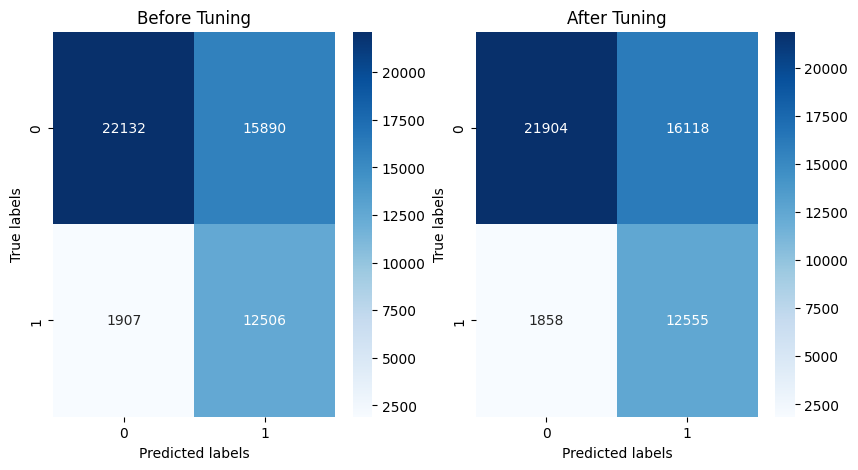

In [163]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
sns.heatmap(cm_default, annot=True, fmt='d', cmap='Blues', ax=axs[0])

# Add labels to the x-axis and y-axis

axs[0].set_xlabel('Predicted labels')
axs[0].set_ylabel('True labels')
axs[0].set_title('Before Tuning')


sns.heatmap(cm_tuned, annot=True, fmt='d', cmap='Blues', ax=axs[1])

# Add labels to the x-axis and y-axis
axs[1].set_xlabel('Predicted labels')
axs[1].set_ylabel('True labels')
axs[1].set_title('After Tuning')

# Show the plot
plt.show()

After we compare the score before tuning and after tuning, surprisingly we found out that using Hyperparameter tuning is the recall score is slightly better than without Hyperparameter tuning, so its better to use the models with Hyperparameter tuning.

#### Limitation of our model

Since our model have imbalance Target Variables, and because 'Not_Canceled' data is more than 'Canceled'. Our model will have difficulty in predicting 'Canceled' (Positive) Target Variables.

## Feature Importance

In [216]:
import pandas as pd

# Retrieve feature names from each transformer step
num_feature_names = transformer.transformers_[0][1].get_feature_names_out(num_features)
binary_feature_names = transformer.transformers_[1][1].get_feature_names()
onehot_feature_names = transformer.transformers_[2][1].get_feature_names_out()

# Combine all feature names
all_feature_names = list(num_feature_names) + list(binary_feature_names) + list(onehot_feature_names)

# Create a DataFrame to hold the feature importances
feature_importances = pd.DataFrame({
    'Encoded_Feature': all_feature_names,
    'Importance': importances
})



# Map encoded features back to original features
def map_encoded_to_original(df, transformer, original_feature_names):
    # Initialize mapping dictionary
    feature_map = {}

    # Map numerical features directly
    for feature in original_feature_names:
        feature_map[feature] = [feature]

    # Binary encoded features
    for enc_feature in transformer.transformers_[1][1].get_feature_names():
        original_feature = enc_feature.split('_')[0]
        if original_feature in feature_map:
            feature_map[original_feature].append(enc_feature)
        else:
            feature_map[original_feature] = [enc_feature]

    # One-hot encoded features
    for enc_feature in transformer.transformers_[2][1].get_feature_names_out():
        original_feature = enc_feature.split('_')[0]
        if original_feature in feature_map:
            feature_map[original_feature].append(enc_feature)
        else:
            feature_map[original_feature] = [enc_feature]

    # Convert to DataFrame
    map_df = pd.DataFrame({
        'Original_Feature': [k for k, v in feature_map.items() for _ in v],
        'Encoded_Feature': [e for v in feature_map.values() for e in v]
    })
    return map_df

# Get the feature mapping
feature_mapping = map_encoded_to_original(pd.DataFrame(), transformer, num_features + binary_encod_features + onehot_encod_features)

# Merge feature importances with feature mapping
importance_mapping = pd.merge(feature_importances, feature_mapping, left_on='Encoded_Feature', right_on='Encoded_Feature')

# Sum importances by original feature
final_importances = importance_mapping.groupby('Original_Feature')['Importance'].sum().reset_index()

# Sort by importance
final_importances = final_importances.sort_values(by='Importance', ascending=False)

# Drop the rows where Original_Feature is "reservation"
final_importances = final_importances[final_importances['Original_Feature'] != 'reservation']

# Reset index and drop the old index column
final_importances.reset_index(drop=True, inplace=True)

# Display the final importances without an index column
print(final_importances.to_string(index=False))


              Original_Feature  Importance
                       country    0.131952
                        market    0.069081
                       deposit    0.052239
                  distribution    0.038505
                      assigned    0.032236
   required_car_parking_spaces    0.032202
                      reserved    0.026933
                         agent    0.023718
                       arrival    0.019163
                      customer    0.019105
        previous_cancellations    0.019023
     total_of_special_requests    0.013433
             arrival_date_year    0.010769
                          meal    0.010017
                           adr    0.009052
                      children    0.008924
               booking_changes    0.007808
                         hotel    0.006220
      arrival_date_week_number    0.005726
                     lead_time    0.005626
previous_bookings_not_canceled    0.003185
       stays_in_weekend_nights    0.003166
          s

/usr/local/lib/python3.10/dist-packages/category_encoders/utils.py:366: FutureWarning: `get_feature_names` is deprecated in all of sklearn. Use `get_feature_names_out` instead.
  warnings.warn("`get_feature_names` is deprecated in all of sklearn. Use `get_feature_names_out` instead.",
/usr/local/lib/python3.10/dist-packages/category_encoders/utils.py:366: FutureWarning: `get_feature_names` is deprecated in all of sklearn. Use `get_feature_names_out` instead.
  warnings.warn("`get_feature_names` is deprecated in all of sklearn. Use `get_feature_names_out` instead.",


## Conclusion and Recommendation

### Conclusion

In [168]:
print('Classification Report Tuned XGBoost : \n', report_tuned)

Classification Report Tuned XGBoost : 
               precision    recall  f1-score   support

           0       0.92      0.58      0.71     38022
           1       0.44      0.87      0.58     14413

    accuracy                           0.66     52435
   macro avg       0.68      0.72      0.65     52435
weighted avg       0.79      0.66      0.67     52435



### Calculating profits gained using Maching Learning

First we need to compare the result of using Machine Learning and without using Machine Learning.

### Scenario 1: Without Machine Learning Prediction
1. Total Bookings (B) = 1000
2. Cancellation Rate (CR): 40% (0.4)
3. Average Room Rate (ARR): $100

##### Cancellations :
- Cancellations = B x CR = 1000 x 0.4 = 400

#### Revenue without Machine Learning:
- Revenue without Machine Learning = (B - Cancellations) x ARR
- (1000 - 400) x 100 = 600 x 100 = $60.000

### Scenario 2: With Machine Learning Prediction and 100% Retention Rate
1. Total Bookings (B): 1000
2. Cancellation Rate (CR): 40% (0.4)
3. Average Room Rate (ARR): $100
4. Recall (R): 87% (0.87)
5. Precision (P): 44% (0.44)
6. Discount Rate (D): 30% (0.3)
7. Retention Rate (RR): 100% (1.0)

####Predicted Cancellations:
- Predicted Cancellations = B x CR x R
- 1000 x 0.4 x 0.87=348

####Retained Bookings:
- Retained bookings = Predicted Cancellations = 348

####Revenue with Machine Learning (Discounted Bookings):
- Revenue with Machine Learning (Discounted Bookings) = Retained Bookings x ARR x (1 - D)
- 348 x 100 x 0.7 = $24.360

####Non-Discounted Bookings
- Non-Discounted Bookings = B - Predicted Cancellations
- 1000 - 348 = 652

####Revenue from non-discounted booking
- Revenue from non-discounted booking= Non-Discounted Bookings x ARR
- 652 x 100 = $65.200

####Total Revenue with Machine Learning
- Total Revenue with Machine Learning = Revenue with Discount + Revenue from Non-Discounted Booking
- 24.360 + 65.200 = $89.560

### Comparison
- Revenue without Machine Learning: 60.000USD
- Revenue with Machine Learning: 89.560USD

### Net Benefit of Machine Learning
- Net Benefit = Revenue With Machine Learning - Revenue without Machine Learning
- 89.560 - 60.000 = $29.560

In our case, using machine learing prediction to correctly offer a 30% discount to predicted cancellations (with 100% retention) results in a net benefit of $29.800, demosntrating a significant improvement in revenue compared to not using machine learning.

#----------------------------------------------------------------------------------------------------------------------------------------